<a href="https://colab.research.google.com/github/JulioLaz/credit_scoring_predict/blob/main/Credit_Scoring_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**

##    By Julio Alberto Lazarte




---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# AMPLIAR VISUALIZACION DE TABLAS:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
!pip install translate

In [5]:
### Traducctor:
from translate import Translator

def traducir(texto):
    translator = Translator(to_lang="es", from_lang="en")
    translation = translator.translate(texto)
    return translation

#**2. Preprocesamiento de Datos**


---


In [6]:
df_banco = pd.read_csv('/content/drive/MyDrive/credit_scoring/german_credit.csv')
df_banco.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [7]:
# Diccionario de mapeo de nombres de columnas
column_mapping = {
    'default': 'Incumplimiento',
    'account_check_status': 'Estado_cuenta',
    'duration_in_month': 'Duracion_meses',
    'credit_history': 'Historial_credito',
    'purpose': 'Proposito',
    'credit_amount': 'Monto_credito',
    'savings': 'Ahorros',
    'present_emp_since': 'Empleo_actual',
    'installment_as_income_perc': 'Cuota_como_porcentaje_ingreso',
    'personal_status_sex': 'Estado_personal_sexo',
    'other_debtors': 'Otros_deudores',
    'present_res_since': 'Residencia_actual_desde',
    'property': 'Propiedad',
    'age': 'Edad',
    'other_installment_plans': 'Otros_planes_cuotas',
    'housing': 'Vivienda',
    'credits_this_bank': 'Creditos_en_banco',
    'job': 'Trabajo',
    'people_under_maintenance': 'Personas_a_cargo',
    'telephone': 'Telefono',
    'foreign_worker': 'Trabajador_extranjero'
}

# Renombrar las columnas utilizando el diccionario de mapeo
df_banco.rename(columns=column_mapping, inplace=True)
df_banco.columns

Index(['Incumplimiento', 'Estado_cuenta', 'Duracion_meses',
       'Historial_credito', 'Proposito', 'Monto_credito', 'Ahorros',
       'Empleo_actual', 'Cuota_como_porcentaje_ingreso',
       'Estado_personal_sexo', 'Otros_deudores', 'Residencia_actual_desde',
       'Propiedad', 'Edad', 'Otros_planes_cuotas', 'Vivienda',
       'Creditos_en_banco', 'Trabajo', 'Personas_a_cargo', 'Telefono',
       'Trabajador_extranjero'],
      dtype='object')

In [73]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Incumplimiento                 1000 non-null   int64 
 1   Estado_cuenta                  1000 non-null   object
 2   Duracion_meses                 1000 non-null   int64 
 3   Historial_credito              1000 non-null   object
 4   Proposito                      1000 non-null   object
 5   Monto_credito                  1000 non-null   int64 
 6   Ahorros                        1000 non-null   object
 7   Empleo_actual                  1000 non-null   object
 8   Cuota_como_porcentaje_ingreso  1000 non-null   int64 
 9   Estado_personal_sexo           1000 non-null   object
 10  Otros_deudores                 1000 non-null   object
 11  Residencia_actual_desde        1000 non-null   int64 
 12  Propiedad                      1000 non-null   object
 13  Edad

## Extraer diccionario:

In [8]:
###   obtener diccionario   ####
df_dic=pd.read_json('/content/drive/MyDrive/credit_scoring/dic_00.json')
df_dic=df_dic[['name','categories']]

###   invertir clave por valor en categories  ####
df_dic['categories'] = df_dic['categories'].apply(lambda x: {v: k for k, v in x.items()} if isinstance(x, dict) else x)
df_dic

,name,categories
0,default,"{'Good customer': '0', 'Bad customer': '1'}"
1,account_check_status,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"
2,duration_in_month,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
3,credit_history,"{'no credits taken/ all credits paid back duly': '1', 'all credits at this bank paid back duly': '2', 'existing credits paid back duly till now': '3', 'delay in paying off in the past': '4', 'critical account/ other credits existing (not at this bank)': '5'}"
4,purpose,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
5,credit_amount,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
6,savings,"{'... < 100 DM': '5', '100 <= ... < 500 DM': '4', '500 <= ... < 1000 DM ': '3', '.. >= 1000 DM ': '2', 'unknown/ no savings account': '1'}"
7,present_emp_since,"{'unemployed': '5', '... < 1 year ': '4', '1 <= ... < 4 years': '3', '4 <= ... < 7 years': '2', '.. >= 7 years': '1'}"
8,installment_as_income_perc,NaN
9,personal_status_sex,"{'male : single': '3', 'female : divorced/separated/married': '2', 'male : divorced/separated': '1', 'male : married/widowed': '4', 'female : single': '5'}"


In [9]:
# TRADUCIR: Diccionario de mapeo de nombres de columnas
# Aplicar el mapeo a la columna 'name'
df_dic['name'] = df_dic['name'].map(column_mapping)
df_dic['name']


0                    Incumplimiento
1                     Estado_cuenta
2                    Duracion_meses
3                 Historial_credito
4                         Proposito
5                     Monto_credito
6                           Ahorros
7                     Empleo_actual
8     Cuota_como_porcentaje_ingreso
9              Estado_personal_sexo
10                   Otros_deudores
11          Residencia_actual_desde
12                        Propiedad
13                             Edad
14              Otros_planes_cuotas
15                         Vivienda
16                Creditos_en_banco
17                          Trabajo
18                 Personas_a_cargo
19                         Telefono
20            Trabajador_extranjero
Name: name, dtype: object

## Asignar las varibles cuantitativas discretas a las columnas con los valores extraidos del dic

In [10]:
df_banco.drop_duplicates()

#### Itera sobre las columnas de data

df_bank=df_banco.copy()
for column in df_bank.columns:
    if column in df_dic['name'].values and column not in ['Incumplimiento', 'Duracion_meses', 'Monto_credito', 'Edad']:
        categories_dict = df_dic[df_dic['name'] == column]['categories'].iloc[0]
        if isinstance(categories_dict, dict):
          df_bank[column] = df_bank[column].map(categories_dict)
df_bank=df_bank.astype(int)

df_bank

,Incumplimiento,Estado_cuenta,Duracion_meses,Historial_credito,Proposito,Monto_credito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Estado_personal_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Edad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,12,3,4,1736,5,2,3,2,1,4,1,31,3,2,1,2,1,0,1
996,0,1,30,3,2,3857,5,3,4,1,1,4,2,40,3,2,1,4,1,1,1
997,0,4,12,3,5,804,5,1,4,3,1,4,3,38,3,2,1,3,1,0,1
998,1,1,45,3,5,1845,5,3,4,3,1,4,4,23,3,3,1,3,1,1,1


In [77]:
cosa = df_dic[df_dic['name'] == 'Duracion_meses']['categories'].iloc[0]
print(cosa)


{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}


##Cambiar los valores de las columnas: age, credit_amount, duration_in_month a rangos según se muestra:

In [11]:
# Define los rangos y las etiquetas
bins_age = [18, 30, 40, 50, 60, 70, 80]
labels_age = [1, 2, 3, 4, 5, 6]

bins_credit_amount = [1, 1000, 2000, 3000, 4000, 5000, 6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
labels_credit_amount = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

bins_duration_in_month = [1, 12, 24, 36, 48, 60, 72]
labels_duration_in_month = [1, 2, 3, 4, 5, 6]

# Aplica la transformación a las columnas:
df_bank['Rango_edad'] = pd.cut(df_bank['Edad'], bins=bins_age, labels=labels_age, include_lowest=True)
df_bank['Rango_valor_credito'] = pd.cut(df_bank['Monto_credito'], bins=bins_credit_amount, labels=labels_credit_amount, include_lowest=True)
df_bank['Rango_plazos_credito'] = pd.cut(df_bank['Duracion_meses'], bins=bins_duration_in_month, labels=labels_duration_in_month, include_lowest=True)
df_bank.drop(['Edad','Monto_credito','Duracion_meses'], axis=1, inplace=True)

df_bank=df_bank.astype(int)
df_bank.head()

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Estado_personal_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito
0,0,1,5,5,1,1,4,3,1,4,1,3,2,2,3,1,1,1,5,2,1
1,1,2,3,5,5,3,2,2,1,2,1,3,2,1,3,1,0,1,1,6,4
2,0,4,5,8,5,2,2,3,1,3,1,3,2,1,2,2,0,1,3,3,1
3,0,1,3,4,5,2,2,3,3,4,2,3,3,1,3,2,0,1,3,8,4
4,1,1,4,1,5,3,3,3,1,4,4,3,3,2,3,2,0,1,4,5,2


In [12]:
len(df_bank.columns)

21

##Trabajando sobre columnas:

## Creación de columnas sexo y estado_civil a partir de la columna personal_status_sex

In [13]:
### sexo: 0=varón  sexo: 1=mujer
### e_civil: 0=casado  e_civil: 1= soltero
df_bank['Sexo'] = np.where(df_bank['Estado_personal_sexo'] == 2, 1, 0)  # sexo=0 cuando personal_status_sex=2 (mujer), y sexo=1 cuando personal_status_sex=1 o 3 o 4
df_bank['Estado_civil'] = np.where(df_bank['Estado_personal_sexo'].isin([1, 2, 4]), 0, 1)  # estado_civil=1 cuando personal_status_sex=1, 2 o 4, y 0 cuando personal_status_sex=3
df_bank.drop('Estado_personal_sexo',axis=1,inplace=True)
df_bank.head()

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,5,2,1,0,1
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,6,4,1,0
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,3,3,1,0,1
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,3,8,4,0,1
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,4,5,2,0,1


In [81]:
df_bank.Historial_credito.unique()

array([5, 3, 4, 1, 2])

## Agregar valores al df_dic

In [14]:
### borrar fila
df_dic = df_dic[df_dic['name'] != 'Creditos_en_banco']
# df_dic = df_dic[df_dic['name'] != 'Historial_credito']
df_dic = df_dic[df_dic['name'] != 'Cuota_como_porcentaje_ingreso']
df_dic = df_dic[df_dic['name'] != 'Personas_a_cargo']
df_dic = df_dic[df_dic['name'] != 'Residencia_actual_desde']

### aregar data de new columns en dic original   ###
new_rows = [
    {'name': 'Sexo', 'categories': {'varón': '0', 'mujer': '1'}},
    {'name': 'Estado_civil', 'categories': {'married': '0', 'single': '1'}},
    {'name': 'Creditos_en_banco', 'categories': {'one': '1', 'two': '2','three': '3', 'four': '4'}},
    {'name': 'Cuota_como_porcentaje_ingreso', 'categories': {'one': '1', 'two': '2','three': '3', 'four': '4'}},
    {'name': 'Residencia_actual_desde', 'categories': {'one': '1', 'two': '2','three': '3', 'four': '4'}},
    {'name': 'Personas_a_cargo', 'categories': {'one': '1', 'two': '2'}}
    # {'name': 'Historial_credito', 'categories': {'credits paid': '1','credits paid': '2','credits paid': '3','credits paid': '4', 'critical account': '5'}}
]
df_dic = df_dic.append(new_rows, ignore_index=True)
df_dic

,name,categories
0,Incumplimiento,"{'Good customer': '0', 'Bad customer': '1'}"
1,Estado_cuenta,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"
2,Duracion_meses,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
3,Historial_credito,"{'no credits taken/ all credits paid back duly': '1', 'all credits at this bank paid back duly': '2', 'existing credits paid back duly till now': '3', 'delay in paying off in the past': '4', 'critical account/ other credits existing (not at this bank)': '5'}"
4,Proposito,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
5,Monto_credito,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
6,Ahorros,"{'... < 100 DM': '5', '100 <= ... < 500 DM': '4', '500 <= ... < 1000 DM ': '3', '.. >= 1000 DM ': '2', 'unknown/ no savings account': '1'}"
7,Empleo_actual,"{'unemployed': '5', '... < 1 year ': '4', '1 <= ... < 4 years': '3', '4 <= ... < 7 years': '2', '.. >= 7 years': '1'}"
8,Estado_personal_sexo,"{'male : single': '3', 'female : divorced/separated/married': '2', 'male : divorced/separated': '1', 'male : married/widowed': '4', 'female : single': '5'}"
9,Otros_deudores,"{'none': '1', 'co-applicant': '2', 'guarantor': '3'}"


## RENOMBRAR COLUMNAS EN EL DIC


In [15]:
# LOCALIZAR LAS COLUMNAS:
index_to_change_age = df_dic[df_dic['name'] == 'Edad'].index
index_to_change_credit = df_dic[df_dic['name'] == 'Monto_credito'].index
index_to_change_duration = df_dic[df_dic['name'] == 'Duracion_meses'].index

# Cambia el valor en la columna 'name' a 'rango_edad'
df_dic.loc[index_to_change_age, 'name'] = 'Rango_edad'
df_dic.loc[index_to_change_credit, 'name'] = 'Rango_valor_credito'
df_dic.loc[index_to_change_duration, 'name'] = 'Rango_plazos_credito'
df_dic.sample(5)

,name,categories
20,Cuota_como_porcentaje_ingreso,"{'one': '1', 'two': '2', 'three': '3', 'four': '4'}"
14,Trabajo,"{'unemployed/ unskilled - non-resident': '1', 'unskilled - resident': '2', 'skilled employee / official': '3', 'management/ self-employed/ highly qualified employee/ officer': '4'}"
4,Proposito,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
21,Residencia_actual_desde,"{'one': '1', 'two': '2', 'three': '3', 'four': '4'}"
0,Incumplimiento,"{'Good customer': '0', 'Bad customer': '1'}"


In [84]:
categorie = df_dic[df_dic['name'] == 'Sexo']['categories'].iloc[0]
categorie

{'varón': '0', 'mujer': '1'}

##Gráficas de variables vs default:

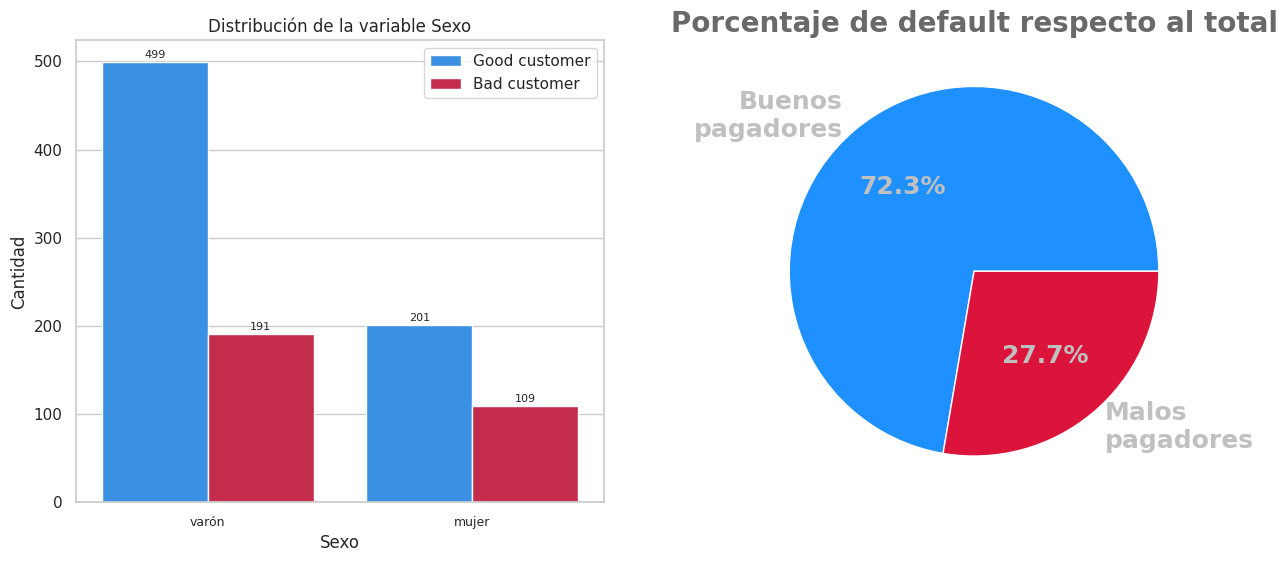

In [85]:
def graf_bar_count_total(x):
    # EXTRAER TEXTO DEL DIC PARA ETIQUETAS
    categories = x
    categorie = df_dic[df_dic['name'] == categories]['categories'].iloc[0]
    categorie_default = df_dic[df_dic['name'] == 'Incumplimiento']['categories'].iloc[0]
    a = []
    for i in categorie:
        a.append(i)
    a = pd.DataFrame(a, columns=[categories])

    # DEFINIR GRÁFICO DE BARRAS
    custom_palette = sns.color_palette(['dodgerblue', 'crimson'])
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 6))
    ax1 = plt.subplot(1, 2, 1)  # Subplot para el gráfico de barras
    ax2 = plt.subplot(1, 2, 2)  # Subplot para el gráfico de pastel

    # Gráfico de barras
    ax1 = sns.countplot(x=x, hue='Incumplimiento', data=df_bank, palette=custom_palette, dodge=True, ax=ax1)

    # Colocar valores al final de las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

    ax1.set_xlabel(x)
    ax1.legend(categorie_default)
    ver = a[x].apply(lambda x: len(x) < 30)
    ver = ver.all()
    if len(a[x]) < 5 and ver:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=0, ha='center')
    elif len(a[x]) < 5 and not ver:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=45, ha='right')
    else:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=45, ha='right')

    ax1.set_ylabel('Cantidad')
    ax1.set_title(f'Distribución de la variable {x}')

    # Gráfico de pastel
    counts = df_bank.groupby([x, 'Incumplimiento']).size().unstack()
    counts['Total'] = counts.sum(axis=1)
    counts['Porcentaje_Mujeres'] = counts[0] / counts['Total'] * 100
    counts['Porcentaje_Varones'] = counts[1] / counts['Total'] * 100

    ax2.pie(counts.loc[0, ['Porcentaje_Mujeres', 'Porcentaje_Varones']], labels=['Buenos\npagadores', 'Malos\npagadores'],
            autopct='%1.1f%%', colors=['dodgerblue', 'crimson'],textprops={'fontsize': 18, 'color': 'silver','fontweight':'bold'})
    ax2.set_title('Porcentaje de default respecto al total',fontsize=20,color='dimgray',fontweight= 'bold')

    plt.show()

graf_bar_count_total('Sexo')


In [86]:
### Preparacion para graficar variables vs default:
counts = df_bank.groupby(['Sexo', 'Incumplimiento']).size().unstack()
counts


Incumplimiento,0,1
Sexo,,
0,499,191
1,201,109


In [87]:
counts = df_bank.groupby(['Sexo', 'Incumplimiento']).size()
df_counts=pd.DataFrame(counts)
df_counts.rename(columns={0: 'count'}, inplace=True)
df_counts

count
Sexo Incumplimiento       
0    0                 499
     1                 191
1    0                 201
     1                 109

In [88]:
### Preparación para usar traductor en filas de cada categoría:
categorie = df_dic[df_dic['name'] == 'Trabajo' ]['categories'].iloc[0]
categorie_default = df_dic[df_dic['name'] == 'Incumplimiento' ]['categories'].iloc[0]
a=[]
for i in categorie:
  a.append(i)
a = pd.DataFrame(a, columns=['Trabajo'])

# Aplicar la traducción a la columna a[x]
a['Trabajo'] = a['Trabajo'].map(traducir)
a

,Trabajo
0,desempleados/ no cualificados - no residentes
1,no cualificado - residente
2,empleado / funcionario cualificado
3,directivo/ autónomo/empleado/ directivo altamente cualificado


##Función para gráficar:
### gráfica de barras: la variable selecionada vs defaulty
### gráfica de pie: la variable selecionada vs defaulty en %

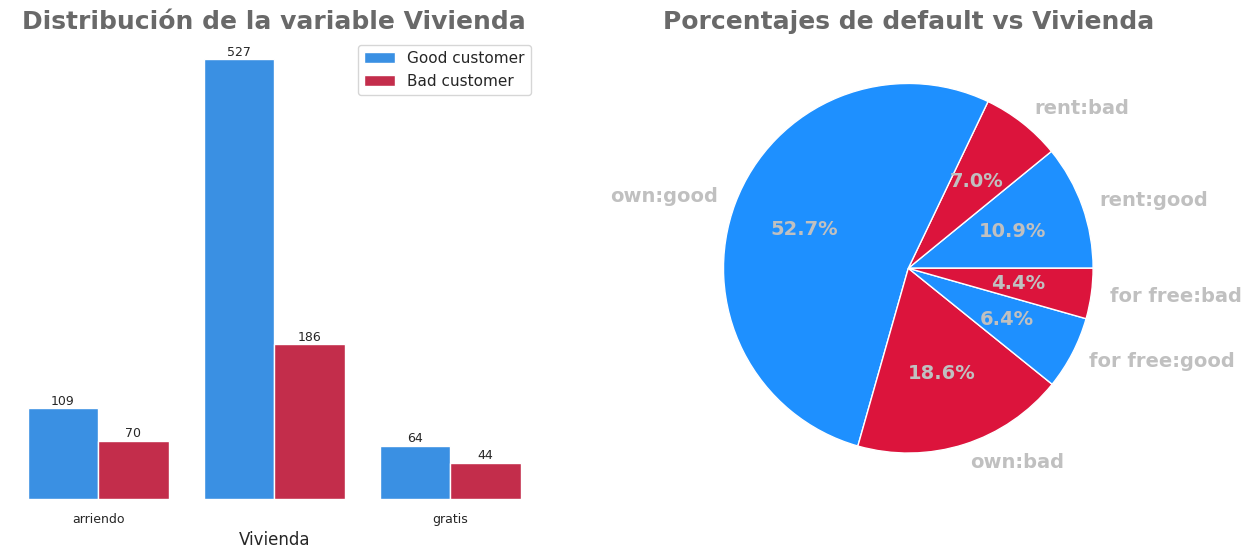

In [89]:
def graf_bar_count_x100(x):
    # EXTRAER TEXTO DEL DIC PARA ETIQUETAS
    categories = x
    categorie = df_dic[df_dic['name'] == categories]['categories'].iloc[0]
    categorie_default = df_dic[df_dic['name'] == 'Incumplimiento']['categories'].iloc[0]
    a = []
    labels=[]
    for i in categorie:
        a.append(i)
        labels.append(f'{i}:good')
        labels.append(f'{i}:bad')
    a = pd.DataFrame(a, columns=[categories])
    a[x] = a[x].map(traducir)


    # DEFINIR GRÁFICO DE BARRAS
    custom_palette = sns.color_palette(['dodgerblue', 'crimson'])
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 6))
    ax1 = plt.subplot(1, 2, 1)  # Subplot para el gráfico de barras
    ax2 = plt.subplot(1, 2, 2)  # Subplot para el gráfico de pie

    # Gráfico de barras
    ax1 = sns.countplot(x=x, hue='Incumplimiento', data=df_bank, palette=custom_palette, dodge=True, ax=ax1)

    # Colocar valores al final de las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

    ax1.set_xlabel(x)
    ax1.legend(categorie_default)
    plt.box(False)

    ver = a[x].apply(lambda x: len(x) < 30)
    ver = ver.all()

    if len(a[x]) < 5 and ver:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=0, ha='center')
    elif len(a[x]) < 5 and not ver:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=45, ha='right')
    else:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=45, ha='right')

    ax1.set_ylabel('Cantidad')
    ax1.set_title(f'Distribución de la variable {x}', fontsize=18, color='dimgray', fontweight='bold')

    # Quitar grid, ticks en x e y de la gráfica ax1
    ax1.grid(False)
    plt.box(False)
    # ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylabel('')
    # ax1.set_xlabel('')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Gráfico de pie
    counts = df_bank.groupby([x, 'Incumplimiento']).size()
    if len(labels)<7:
      ax2.pie(counts, labels=labels, colors=['dodgerblue', 'crimson'], autopct='%1.1f%%',textprops={'fontsize': 14, 'color': 'silver', 'fontweight': 'bold'})
    else:
      ax2.pie(counts, labels=labels, colors=['dodgerblue', 'crimson'], autopct='%1.1f%%',textprops={'fontsize': 12, 'color': 'silver'})
    ax2.set_title(f'Porcentajes de default vs {x}', fontsize=18, color='dimgray', fontweight='bold')

    plt.show()

# graf_bar_count_x100('Sexo')
graf_bar_count_x100('Vivienda')
# graf_bar_count_x100('Historial_credito')


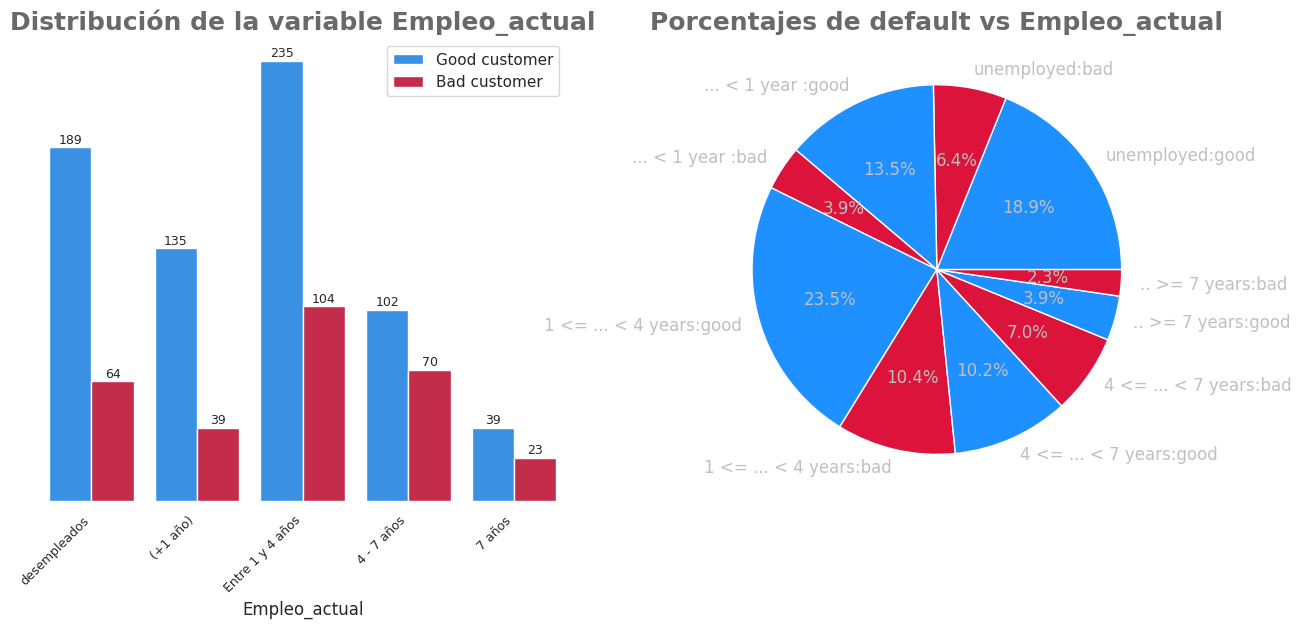

In [90]:
graf_bar_count_x100('Empleo_actual')

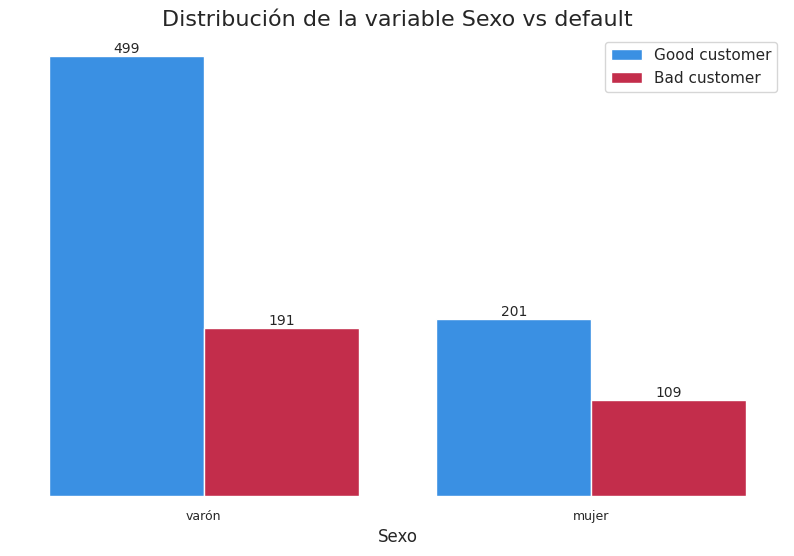

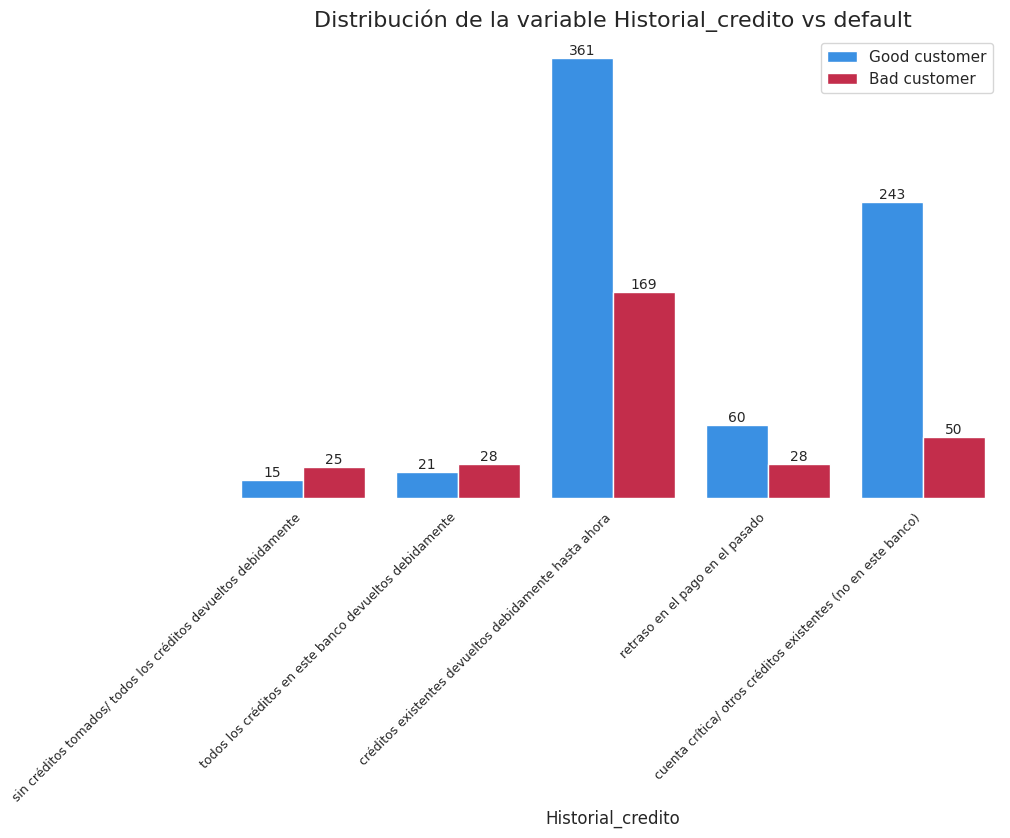

In [91]:
def graf_bar_count(x):
    # EXTREAE TEXTO DEL DIC PARA ETIQUETAS
    categories=x
    categorie = df_dic[df_dic['name'] == categories ]['categories'].iloc[0]
    categorie_default = df_dic[df_dic['name'] == 'Incumplimiento' ]['categories'].iloc[0]

    b=[]
    for i in categorie_default:
      b.append(i)
      # b.append(traducir(i))

    a=[]
    for i in categorie:
      a.append(i)
    a = pd.DataFrame(a, columns=[categories])
    a[x] = a[x].map(traducir)

    #DEFINIR GRAF
    custom_palette = sns.color_palette(['dodgerblue', 'crimson'])
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=x, hue='Incumplimiento', data=df_bank, palette=custom_palette, dodge=True)

    # Colocar valores al final de las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=10)

    plt.xlabel(x)
    plt.legend(b)
    ver=a[x].apply(lambda x: len(x) < 30)
    ver=ver.all()
    if len(a[x]) < 5 and ver:
        plt.xticks(range(len(a[x])), a[x], fontsize=9, rotation=0, ha='center')
    elif len(a[x]) < 5 and not ver:
        plt.xticks(range(len(a[x])), a[x], fontsize=9, rotation=45, ha='right')
    else:
        plt.xticks(range(len(a[x])), a[x], fontsize=9, rotation=45, ha='right')

    legend_x = 0.26  # Ajusta la coordenada x de la leyenda
    legend_y = 0.86 # Ajusta la coordenada y de la leyenda
    # ax.legend(b,title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=len(df_bank.columns))


    plt.ylabel('')
    plt.yticks([])
    plt.title(f'Distribución de la variable {x} vs default',fontsize=16)

    a=pd.DataFrame(a)
    plt.box(False)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=0)
    plt.show()
graf_bar_count('Sexo')
graf_bar_count('Historial_credito')

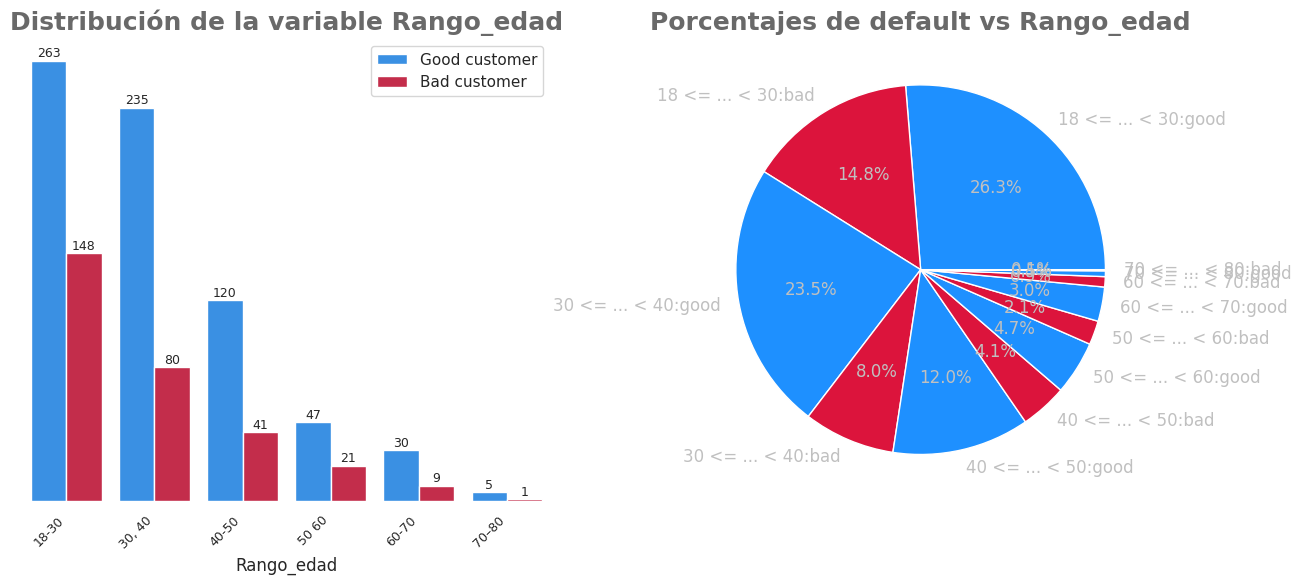

In [92]:
graf_bar_count_x100('Rango_edad')

##Graficar todas:

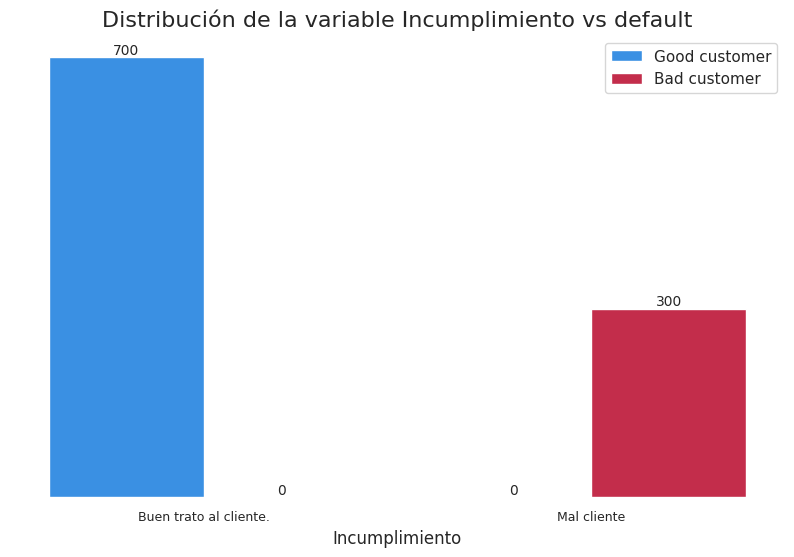

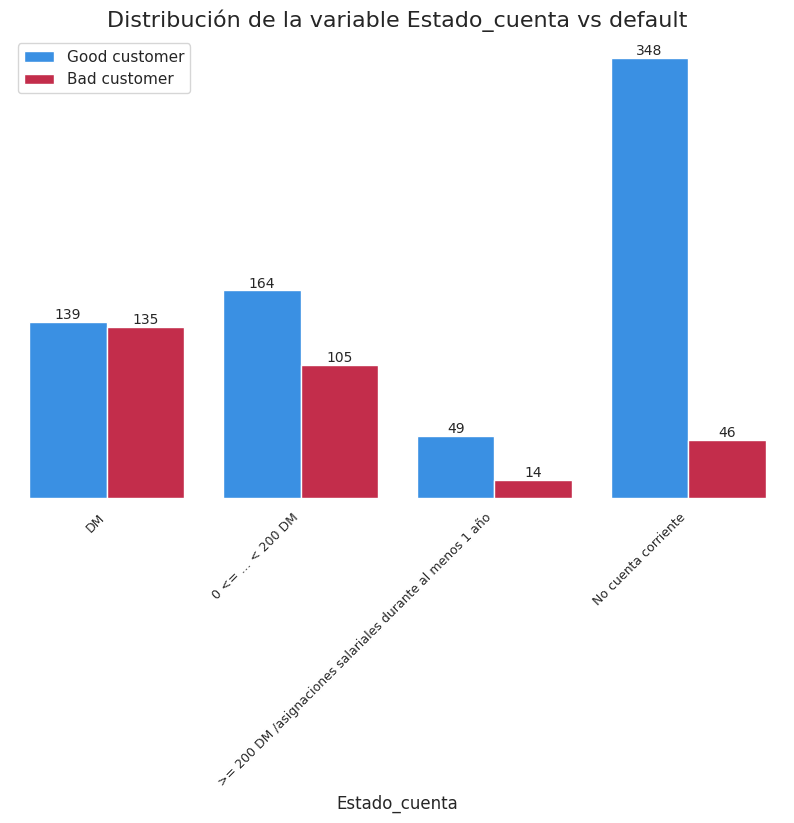

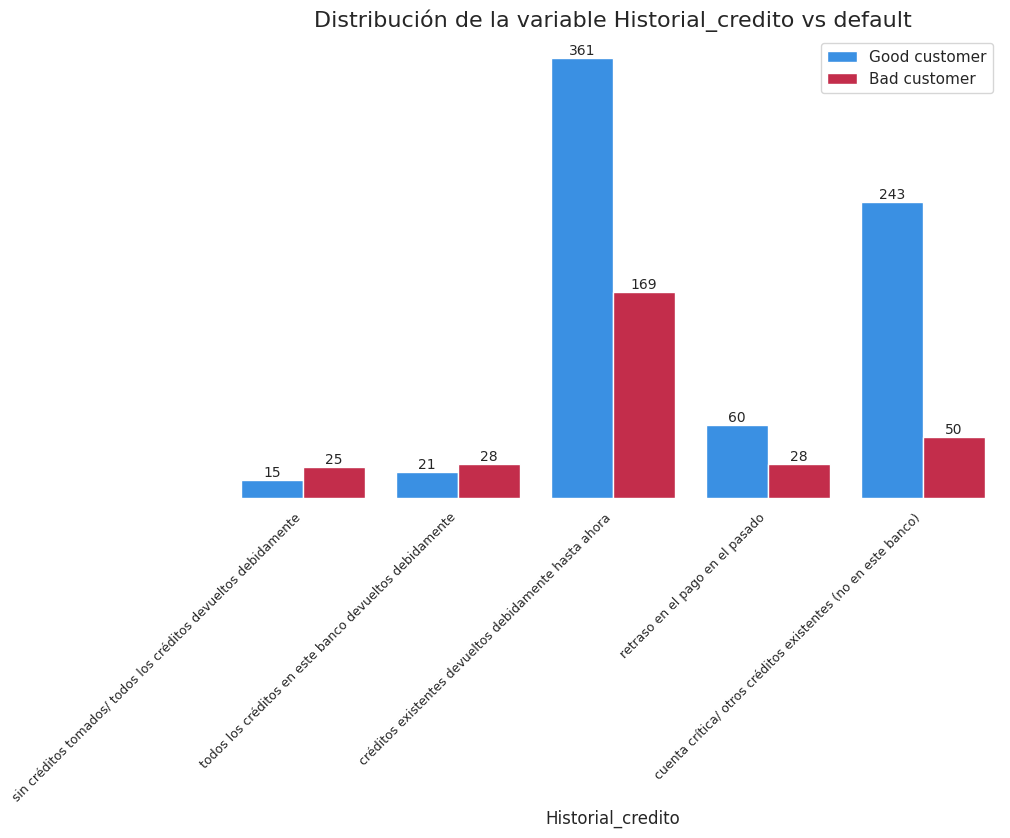

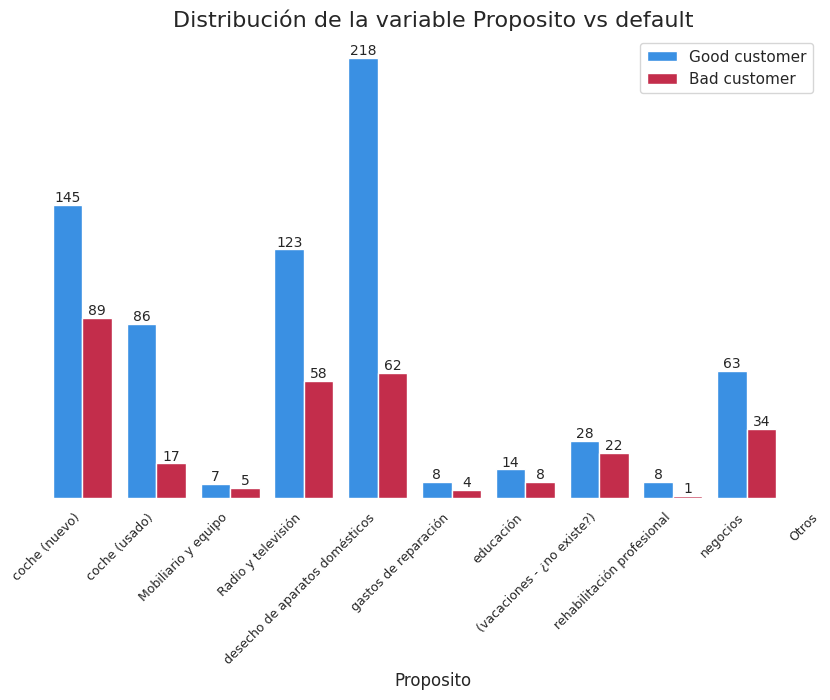

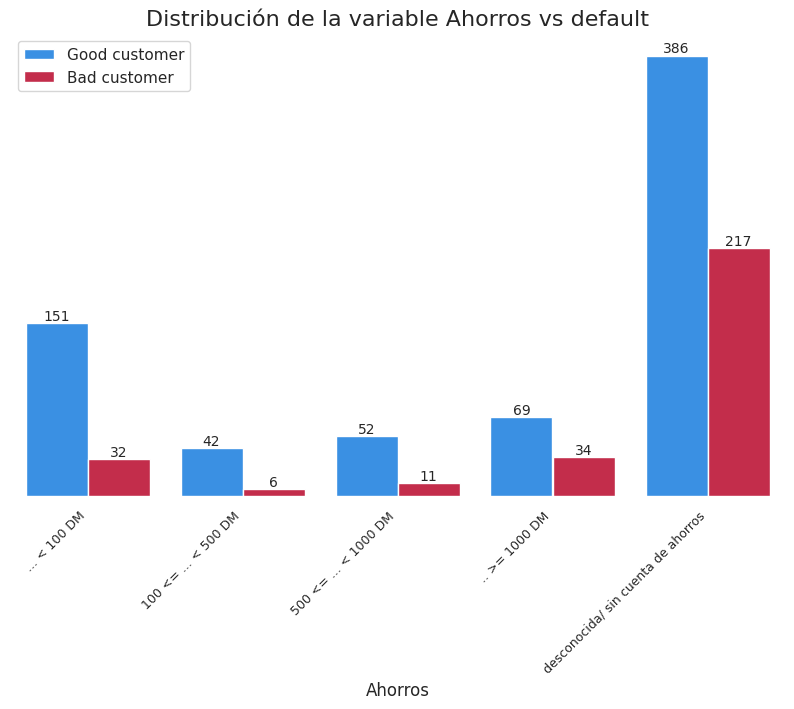

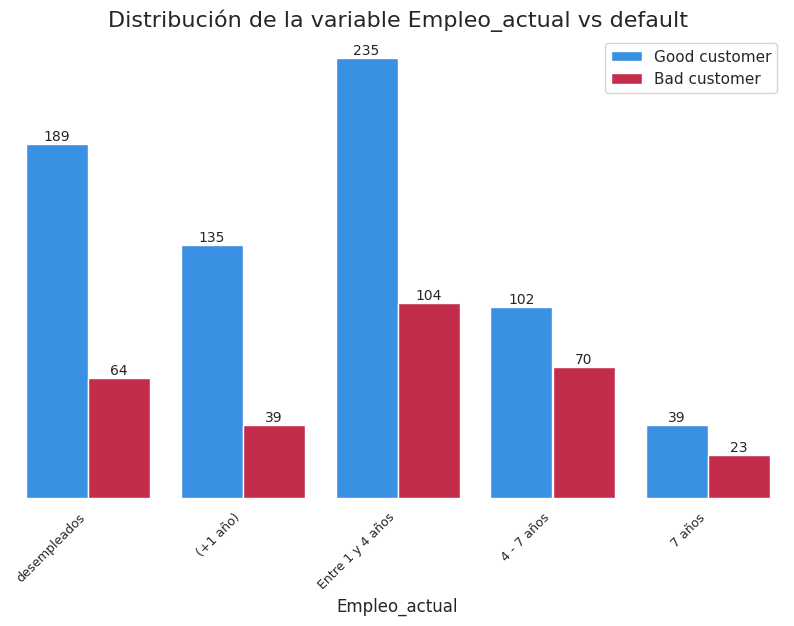

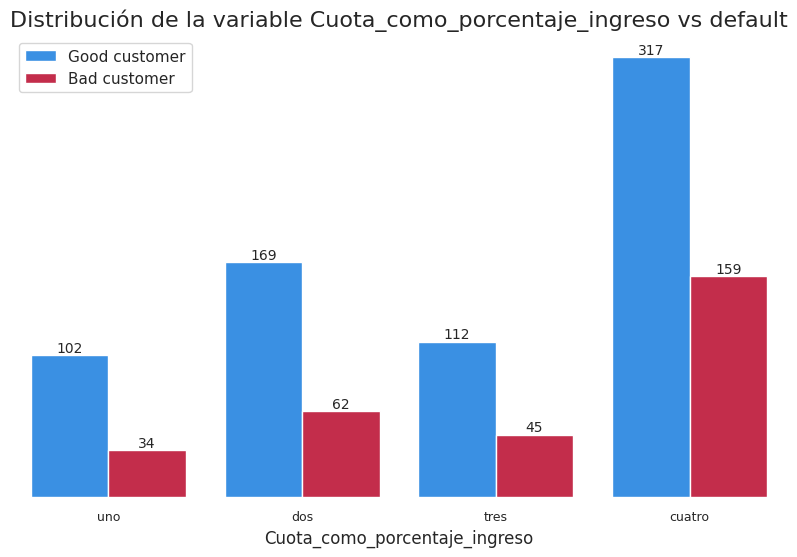

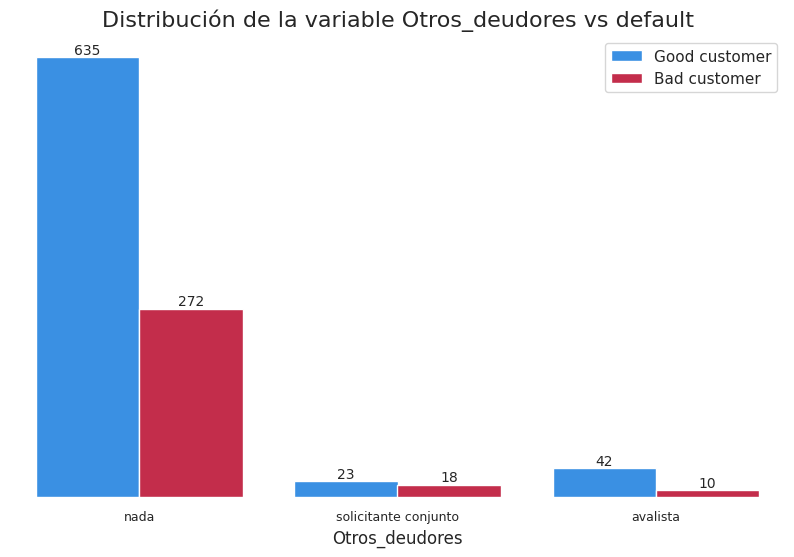

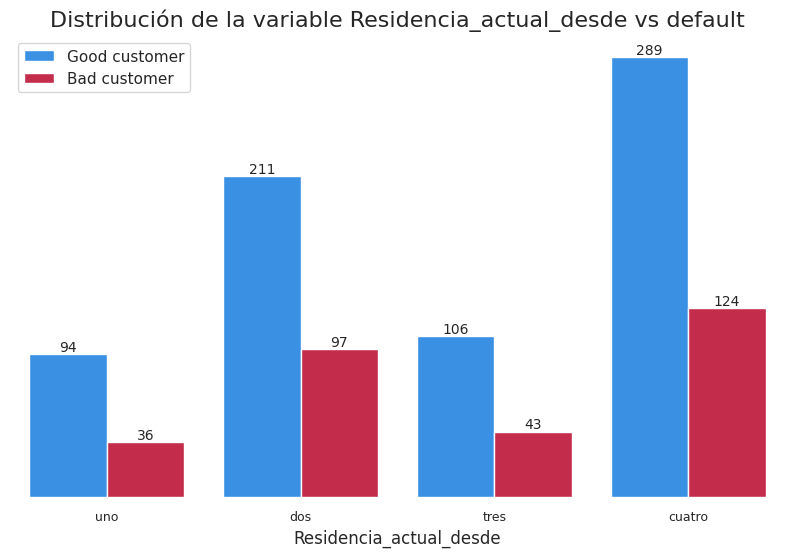

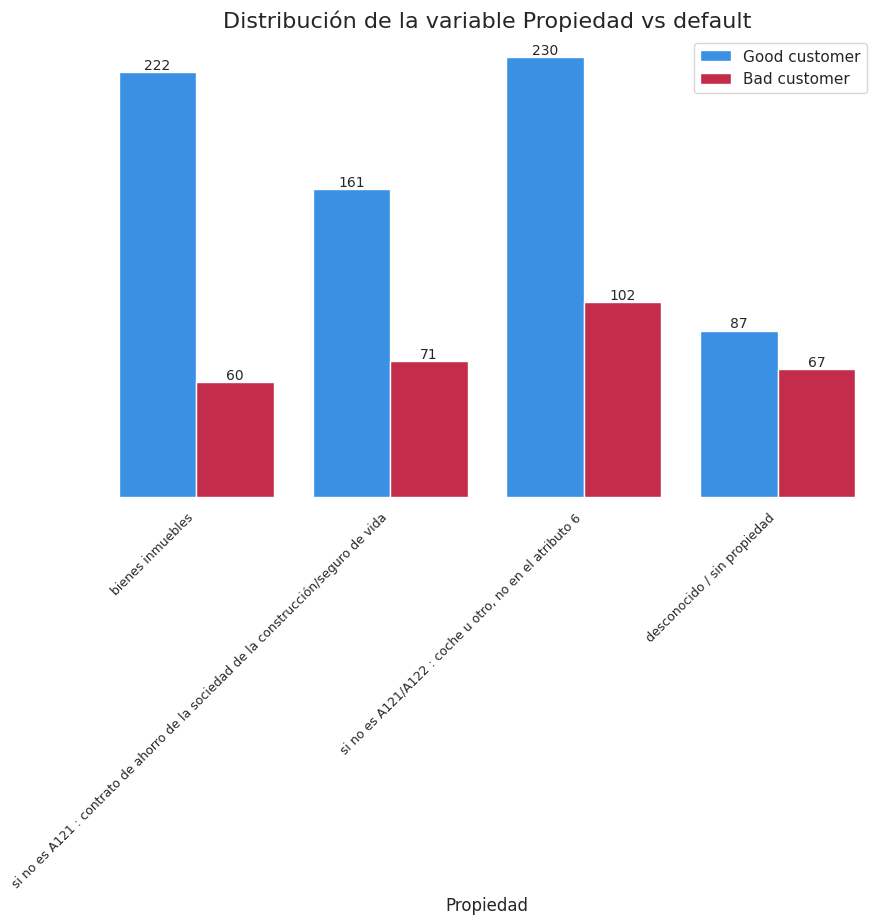

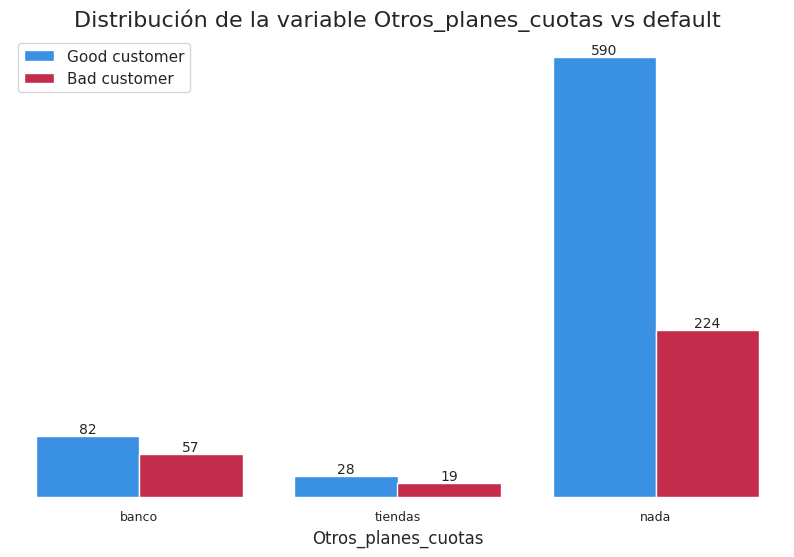

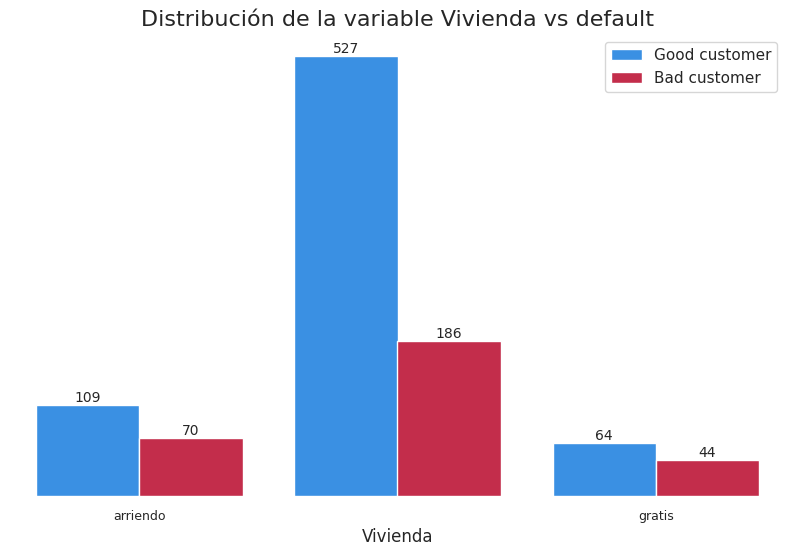

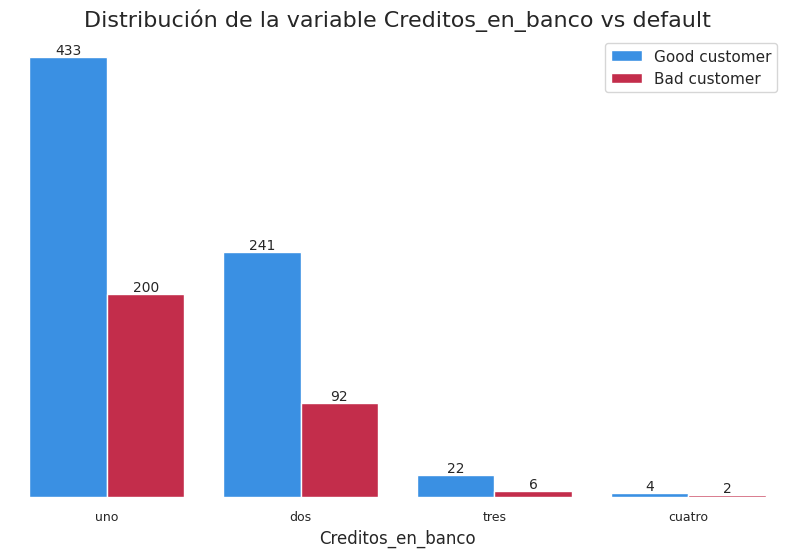

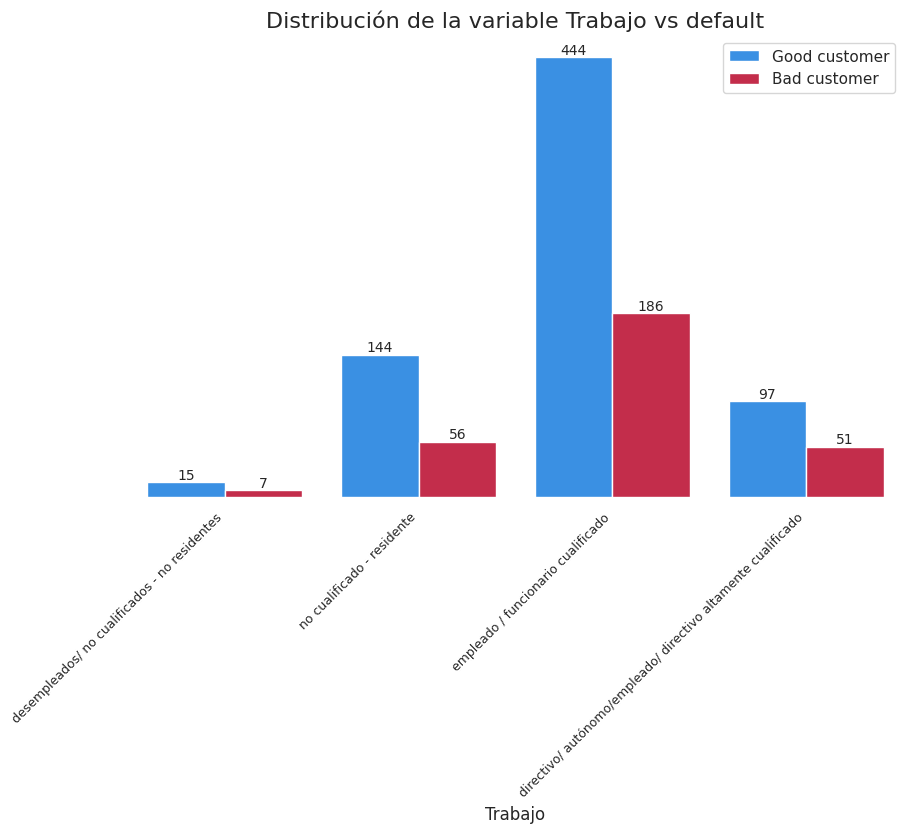

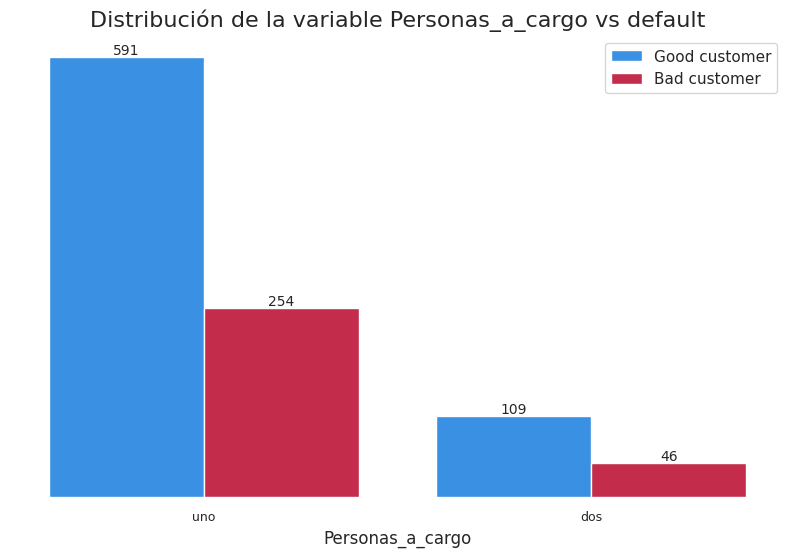

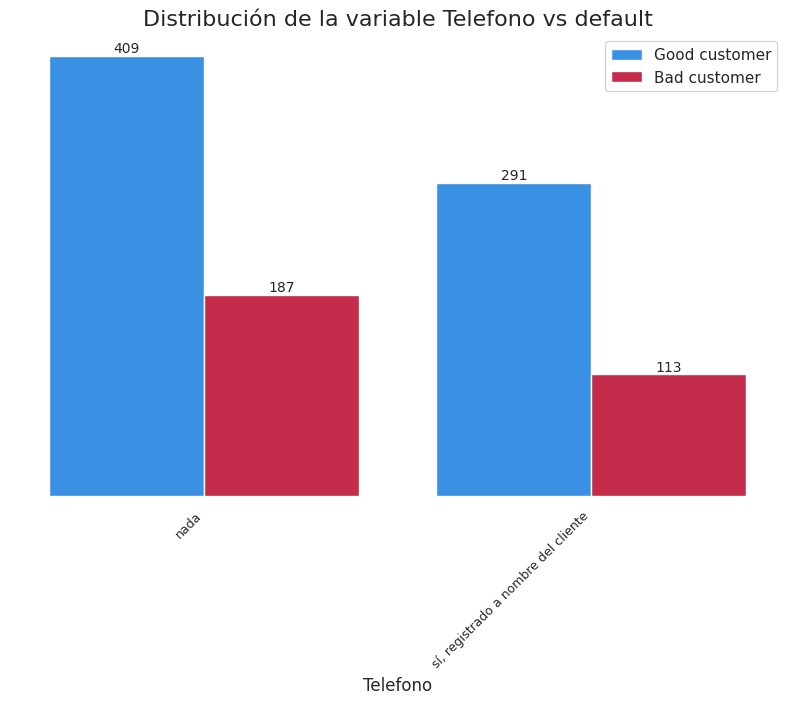

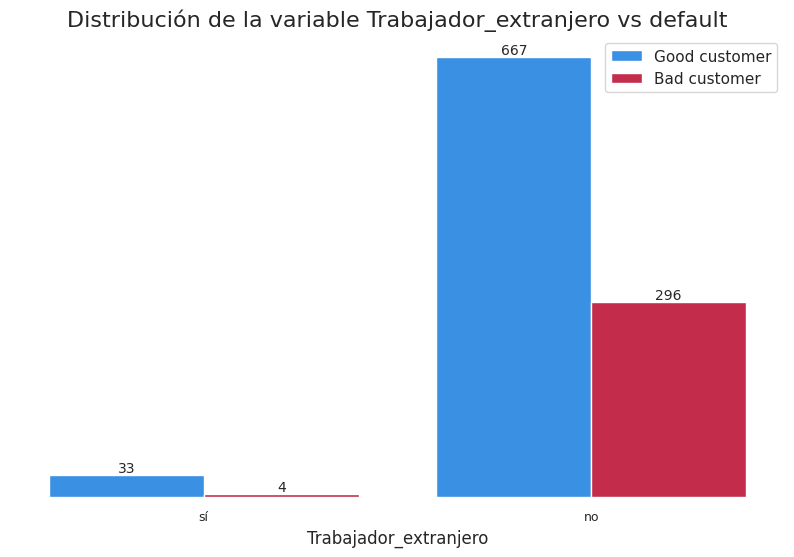

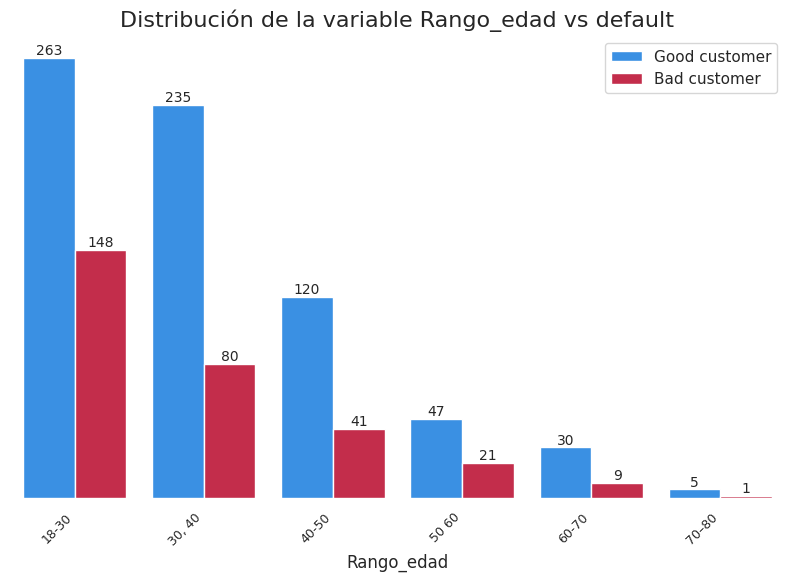

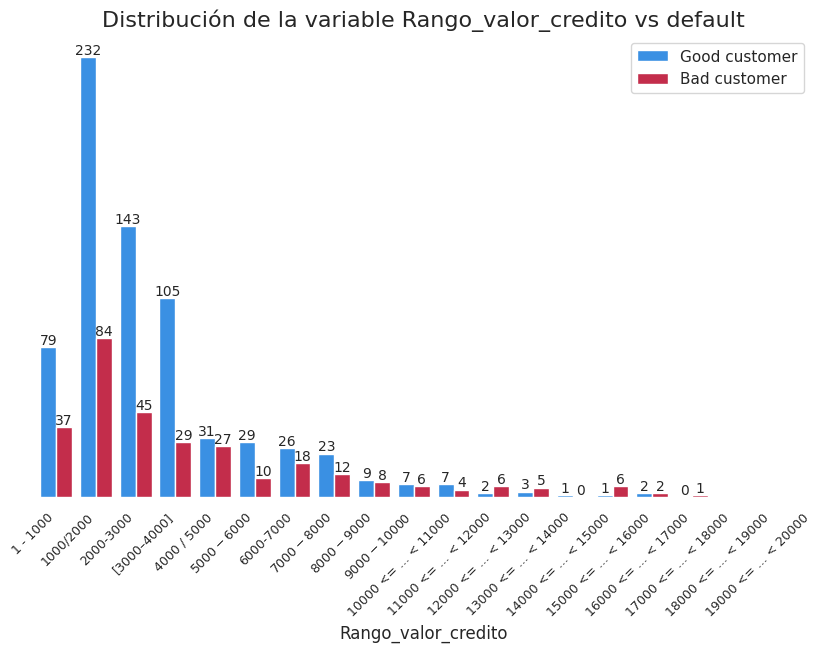

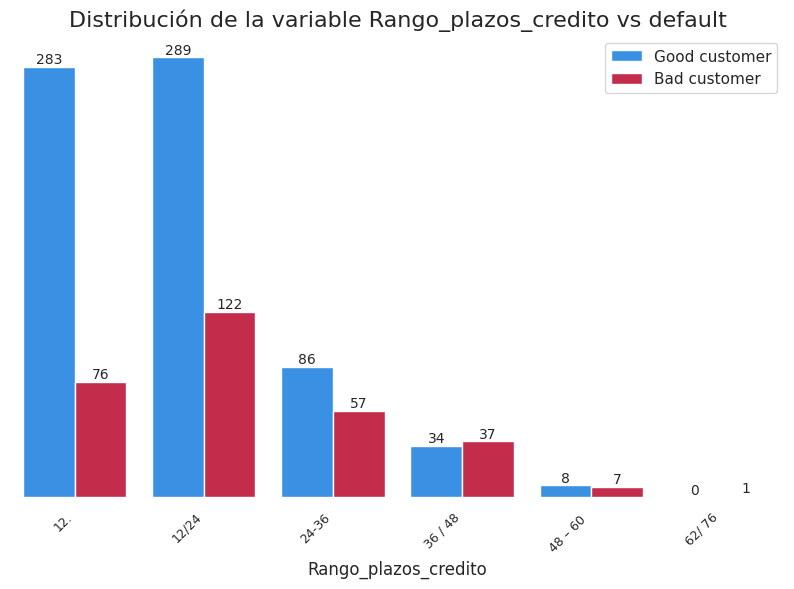

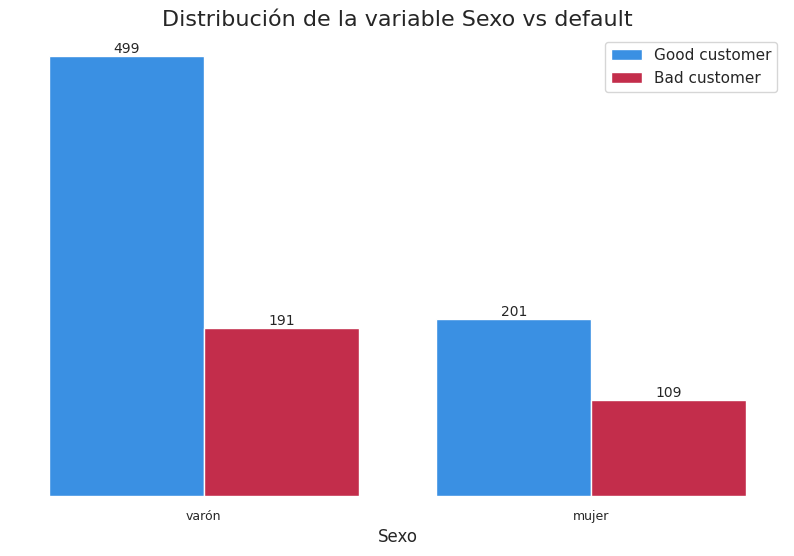

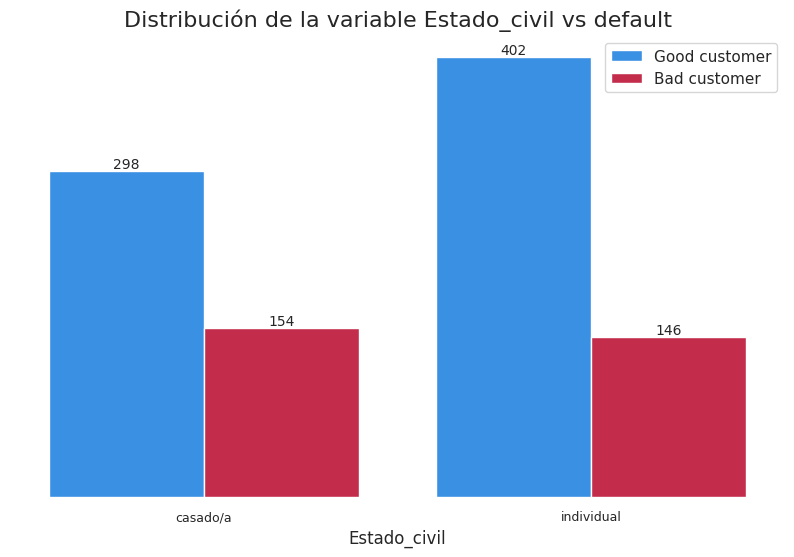

In [120]:
for i in df_bank.columns:
  graf_bar_count(i)

#**3. Exploración de Datos**


---


##Tabla de correlaciones:

In [38]:
correlacion=df_bank.corr()
correlacion.round(2)

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
Incumplimiento,1.00,-0.35,-0.23,0.00,0.18,0.12,0.07,-0.03,0.00,0.14,-0.11,-0.02,-0.05,0.03,-0.00,-0.04,0.08,-0.08,0.15,0.20,0.08,-0.08
Estado_cuenta,-0.35,1.00,0.19,0.05,-0.22,-0.11,-0.01,-0.13,-0.04,-0.03,0.05,0.02,0.08,0.04,-0.01,0.07,0.03,0.07,-0.04,-0.07,-0.03,0.05
Historial_credito,-0.23,0.19,1.00,-0.08,-0.04,-0.14,0.04,-0.04,0.06,-0.05,0.12,0.06,0.44,0.01,0.01,0.05,-0.01,0.14,-0.06,-0.07,-0.07,0.09
Proposito,0.00,0.05,-0.08,1.00,0.02,-0.02,0.08,-0.03,-0.06,-0.03,-0.04,-0.02,0.03,-0.03,-0.06,0.02,0.12,-0.02,-0.03,0.11,-0.02,-0.03
Ahorros,0.18,-0.22,-0.04,0.02,1.00,0.12,-0.02,0.11,-0.09,-0.02,-0.00,-0.01,0.02,-0.01,-0.03,-0.09,0.01,-0.08,-0.06,-0.05,0.03,-0.06
Empleo_actual,0.12,-0.11,-0.14,-0.02,0.12,1.00,-0.13,0.01,-0.25,-0.09,0.04,-0.11,-0.13,-0.10,-0.10,-0.06,-0.03,-0.25,0.01,-0.04,0.20,-0.24
Cuota_como_porcentaje_ingreso,0.07,-0.01,0.04,0.08,-0.02,-0.13,1.00,-0.01,0.05,0.05,-0.00,0.09,0.02,0.10,-0.07,0.01,0.09,0.04,-0.27,0.04,-0.09,0.12
Otros_deudores,-0.03,-0.13,-0.04,-0.03,0.11,0.01,-0.01,1.00,-0.03,-0.16,-0.06,-0.07,-0.03,-0.06,0.02,-0.08,-0.12,-0.03,-0.03,-0.01,-0.01,0.01
Residencia_actual_desde,0.00,-0.04,0.06,-0.06,-0.09,-0.25,0.05,-0.03,1.00,0.15,0.00,0.01,0.09,0.01,0.04,0.10,0.05,0.26,0.03,0.03,0.01,0.06
Propiedad,0.14,-0.03,-0.05,-0.03,-0.02,-0.09,0.05,-0.16,0.15,1.00,-0.09,0.35,-0.01,0.28,0.01,0.20,0.13,0.06,0.31,0.29,-0.05,0.15


##Tabla de correlaciones respecto a default en orden descendente:

In [40]:
correlacion_mayor_target=abs(correlacion['Incumplimiento'])
df_corr_all=correlacion_mayor_target.sort_values(ascending=False)
df_corr_all=pd.DataFrame(df_corr_all)
df_corr_all.round(2)

,Incumplimiento
Incumplimiento,1.00
Estado_cuenta,0.35
Historial_credito,0.23
Rango_plazos_credito,0.20
Ahorros,0.18
Rango_valor_credito,0.15
Propiedad,0.14
Empleo_actual,0.12
Otros_planes_cuotas,0.11
Trabajador_extranjero,0.08


##Gráfica de barras de la relación de correlaciones respecto a default:

In [42]:
correlacion_mayor_target = abs(correlacion['Incumplimiento'])
df_corr_all = correlacion_mayor_target.sort_values(ascending=False)
df_corr_all = pd.DataFrame(df_corr_all)
df_corr_all.reset_index(inplace=True)
df_corr_all.columns = ['Feature', 'Correlation']
df_corr_all.round(4)

,Feature,Correlation
0,Incumplimiento,1.0000
1,Estado_cuenta,0.3508
2,Historial_credito,0.2288
3,Rango_plazos_credito,0.1973
4,Ahorros,0.1789
5,Rango_valor_credito,0.1526
6,Propiedad,0.1426
7,Empleo_actual,0.1160
8,Otros_planes_cuotas,0.1098
9,Trabajador_extranjero,0.0821


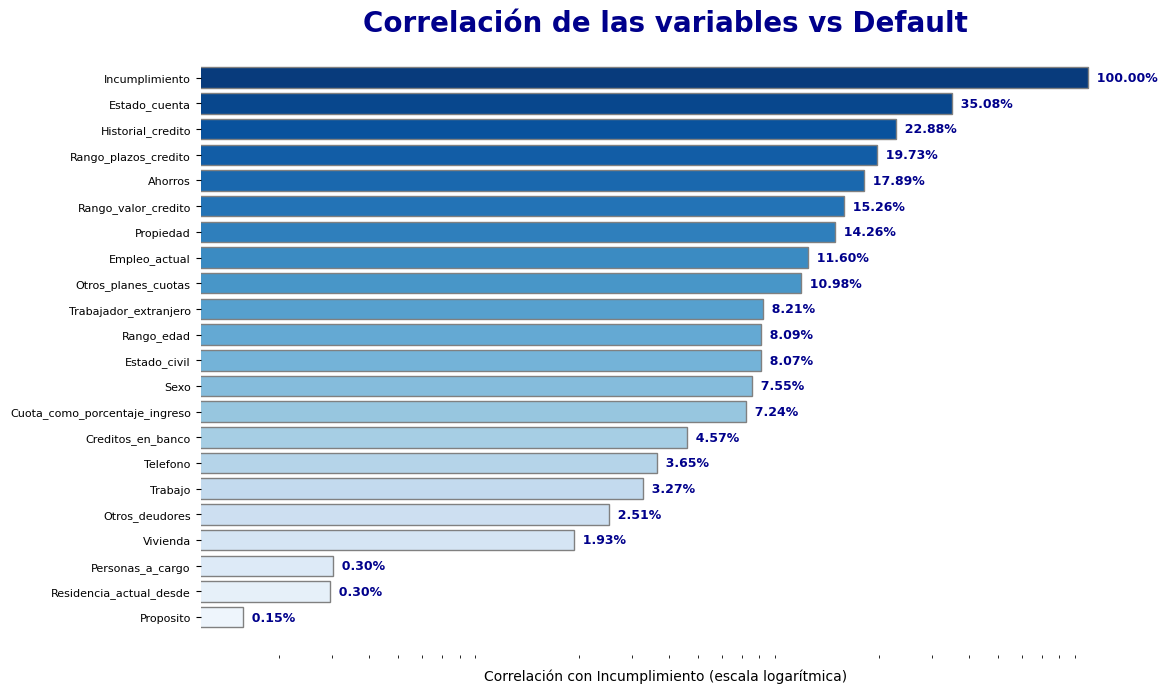

In [47]:
correlacion_mayor_target = abs(correlacion['Incumplimiento'])
df_corr_all = correlacion_mayor_target.sort_values(ascending=False)
df_corr_all = pd.DataFrame(df_corr_all)
df_corr_all.reset_index(inplace=True)
df_corr_all.columns = ['Feature', 'Correlation']

# Ajusta el tamaño de la gráfica y utiliza la paleta 'inferno'
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Blues_r', len(df_corr_all['Correlation']))

# Crea la gráfica de barras horizontales
bars = plt.barh(df_corr_all['Feature'], df_corr_all['Correlation'], color=colors, edgecolor='gray')

# Agrega etiquetas con porcentajes al final de las barras
for bar, value in zip(bars, df_corr_all['Correlation']):
      if value!=0:
          plt.text(value, bar.get_y() + bar.get_height() / 2, f'  {value:.2%} ',ha='left', va='center', color='darkblue', fontsize=9,fontweight='bold')

plt.xscale('log')  # Configura la escala logarítmica en el eje x
plt.xlabel('Correlación con Incumplimiento (escala logarítmica)',)
plt.title('Correlación de las variables vs Default', fontsize=20,fontweight='bold',color='darkblue')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar de mayor a menor


plt.xticks([])
plt.yticks(fontsize=8)
plt.box(False)
plt.grid(False)
plt.show()


##Mapa de calor de correlaciones:

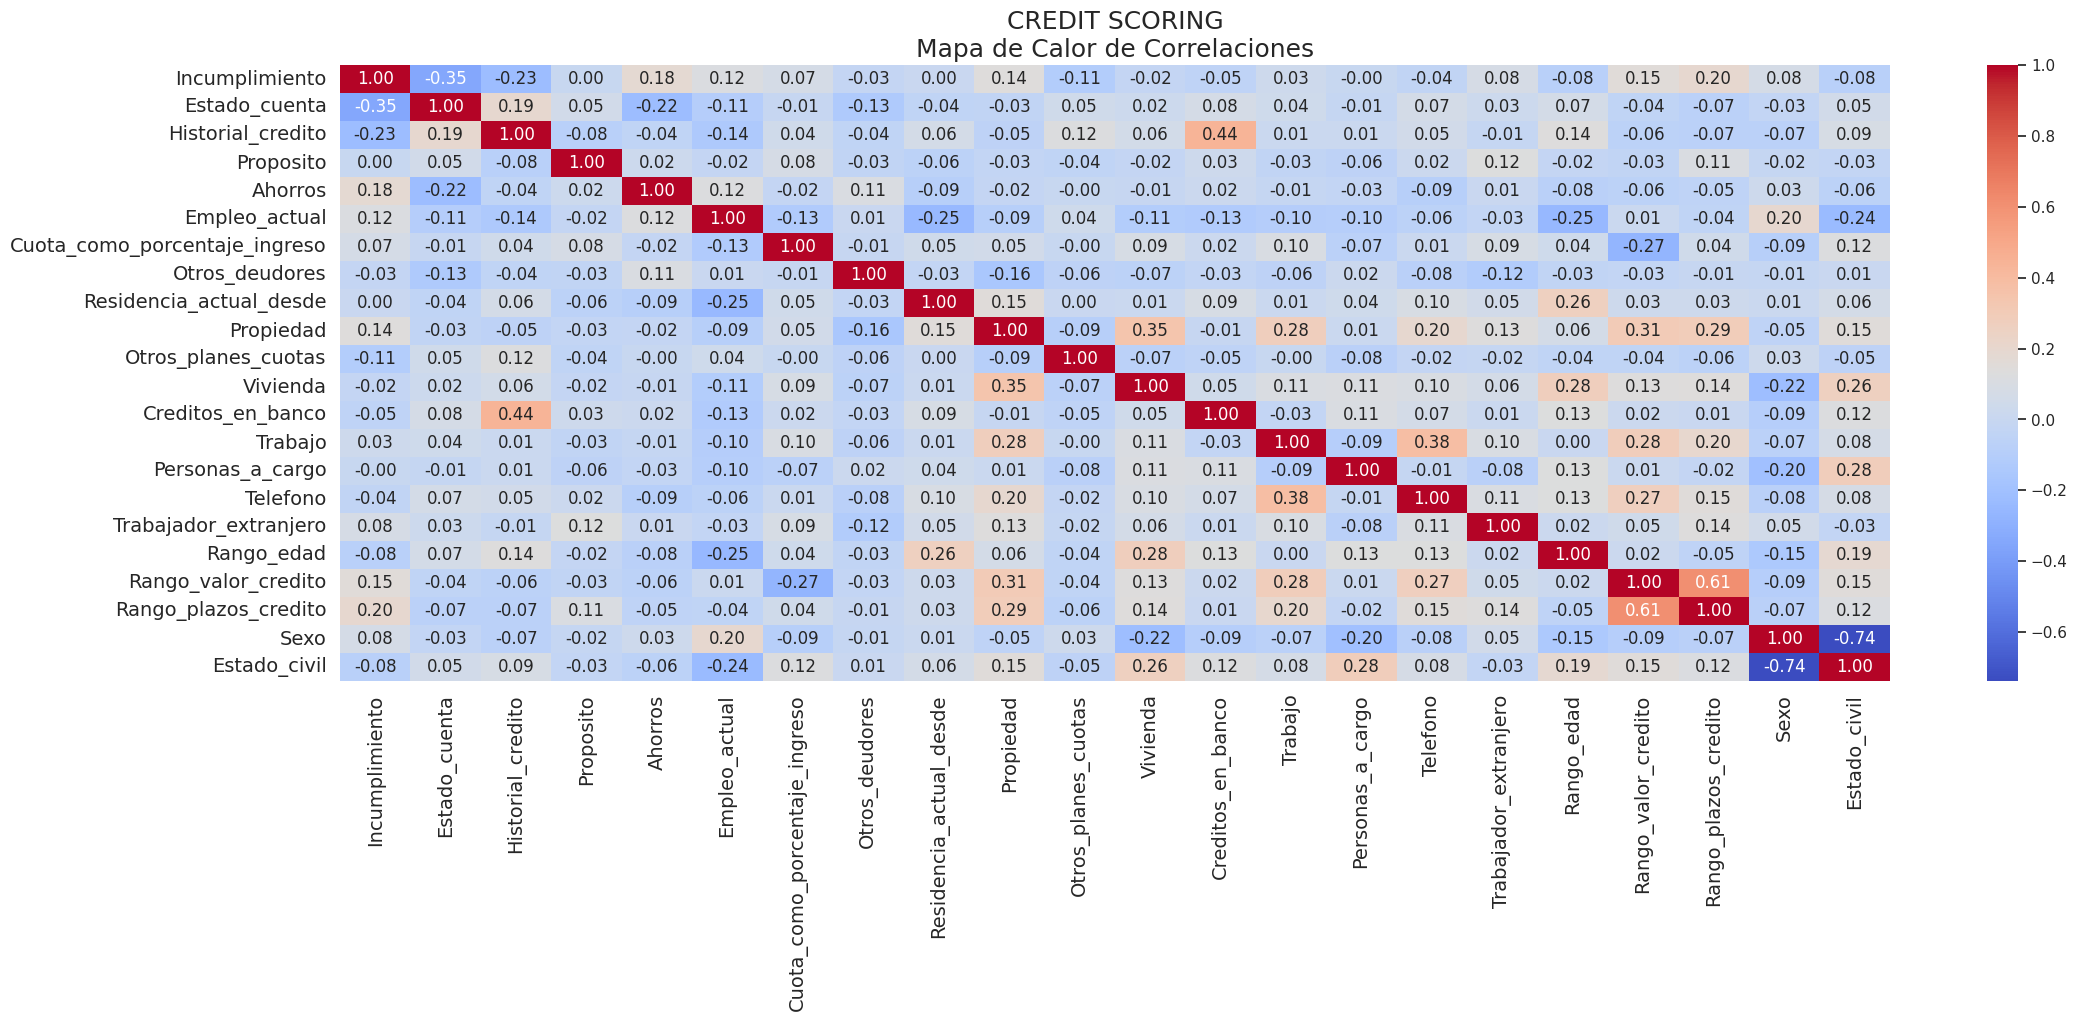

In [97]:
plt.figure(figsize=(25, 8))
heatmap = sns.heatmap(df_bank.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('CREDIT SCORING\nMapa de Calor de Correlaciones', fontsize=18)
plt.show()

##para que sea explicativa una var tiene que se mayor al 7% y menor al 50%

In [98]:
correlacion_mayor_target_7=correlacion_mayor_target[correlacion_mayor_target>.07]
correlacion_mayor_target_7.index.values[:]

array(['Incumplimiento', 'Estado_cuenta', 'Historial_credito', 'Ahorros',
       'Empleo_actual', 'Propiedad', 'Otros_planes_cuotas',
       'Trabajador_extranjero', 'Rango_edad', 'Rango_valor_credito',
       'Rango_plazos_credito', 'Sexo', 'Estado_civil'], dtype=object)

##Elección de las variables significativas con DecisionTreeRegressor:

In [99]:
def graf_best_var_tree(depth):
    # Definir las variables predictoras (X) y la variable objetivo (y)
    X = df_bank.drop('Incumplimiento', axis=1)
    y = df_bank['Incumplimiento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Entrenar un modelo de árbol de decisión
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    tree.fit(X_train, y_train)

    # Extraer los índices de las variables utilizadas en el modelo:
    subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0])
    # Obtener el ranking de características solo para las variables utilizadas
    ranking = np.argsort(tree.feature_importances_)
    # Filtrar solo las variables utilizadas
    subset_ranking = [feature for feature in ranking if feature in subset]

    # Crear gráfico de barras horizontales
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('Reds', len(df_corr_all['Correlation']))

    bars = plt.barh(range(X_train.shape[1]), tree.feature_importances_[ranking], align="center",color=colors)
    plt.yticks(range(X_train.shape[1]), df_bank.columns[ranking])
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title(f'Importancia de las variables\nModelo de árbol de decisión profundidad={depth}')

    # Agregar el valor al final de cada barra
    for bar in bars:
        yval = bar.get_width()
        if yval!=0:
          plt.text(yval, bar.get_y() + bar.get_height()/2, f' {yval:.2%}', ha='left', va='center', fontsize=8)
        else:
          plt.text(yval, bar.get_y() + bar.get_height()/2, f' {yval:.2%}', ha='left', va='center', fontsize=0)
    print(f'Variables count: {X.shape[1]}')
    # print(f'Variables utils: {subset}')
    print(f'Training: {tree.score(X_train, y_train).round(2)*100}%')
    print(f'Test: {tree.score(X_test, y_test).round(2)*100}%')
    print('feature_importances: ', len(df_bank.columns[subset_ranking]))
    print(df_bank.columns[subset_ranking][:-1])###seleccion de las variables
    plt.xticks([])
    plt.yticks(fontsize=8)
    plt.box(False)
    plt.grid(False)
    plt.show()

##Graficando mejores varibles según la profundid del árbol:

Variables count: 21
Training: 80.0%
Test: 75.0%
feature_importances:  14
Index(['Vivienda', 'Personas_a_cargo', 'Rango_plazos_credito',
       'Otros_deudores', 'Propiedad', 'Trabajador_extranjero', 'Ahorros',
       'Proposito', 'Historial_credito', 'Residencia_actual_desde',
       'Estado_cuenta', 'Rango_edad', 'Rango_valor_credito'],
      dtype='object')


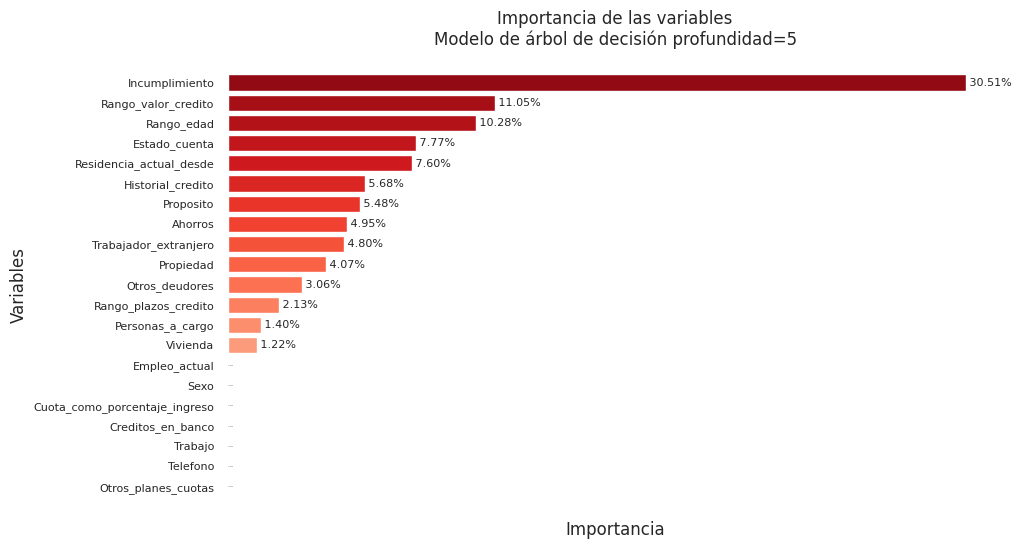

Variables count: 21
Training: 92.0%
Test: 72.0%
feature_importances:  20
Index(['Trabajo', 'Personas_a_cargo', 'Sexo', 'Trabajador_extranjero',
       'Otros_planes_cuotas', 'Rango_plazos_credito', 'Otros_deudores',
       'Empleo_actual', 'Creditos_en_banco', 'Vivienda',
       'Cuota_como_porcentaje_ingreso', 'Propiedad', 'Residencia_actual_desde',
       'Estado_cuenta', 'Rango_valor_credito', 'Proposito', 'Ahorros',
       'Rango_edad', 'Historial_credito'],
      dtype='object')


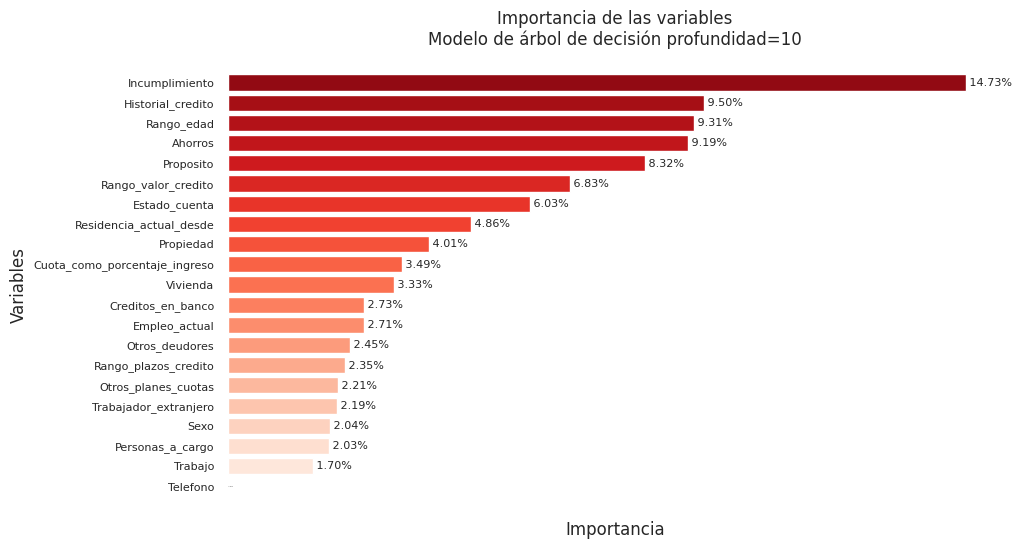

Variables count: 21
Training: 99.0%
Test: 73.0%
feature_importances:  20
Index(['Sexo', 'Empleo_actual', 'Personas_a_cargo', 'Vivienda',
       'Trabajador_extranjero', 'Cuota_como_porcentaje_ingreso',
       'Otros_planes_cuotas', 'Trabajo', 'Propiedad', 'Rango_plazos_credito',
       'Creditos_en_banco', 'Residencia_actual_desde', 'Otros_deudores',
       'Proposito', 'Ahorros', 'Rango_valor_credito', 'Estado_cuenta',
       'Rango_edad', 'Historial_credito'],
      dtype='object')


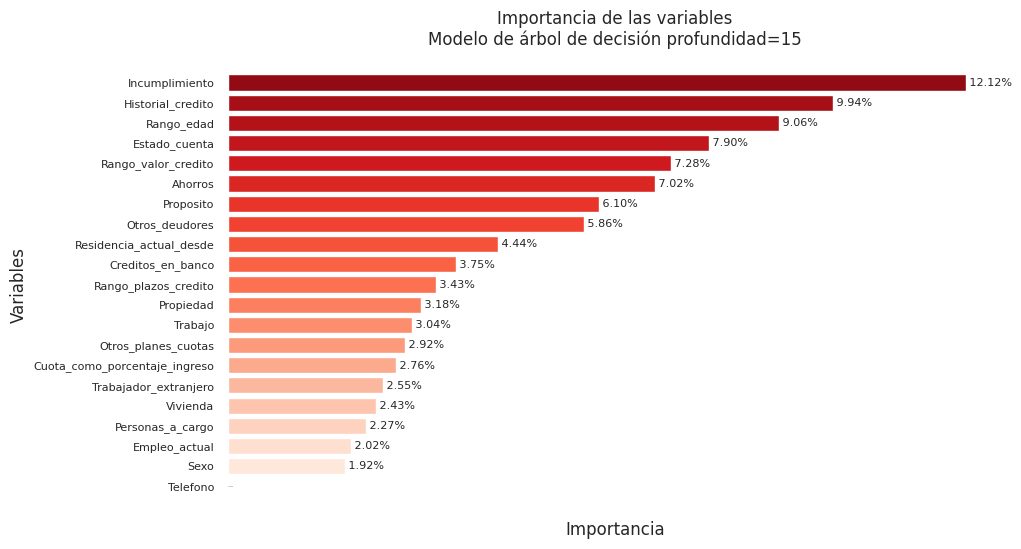

In [100]:
graf_best_var_tree(5)
graf_best_var_tree(10)
graf_best_var_tree(15)


#**Construcción, Evaluación y Selección del Modelo**


---


##Función para comparar modelos ingresando datos train y test:
##Se crea un DF: df_metrics_vs_model

In [52]:
def compare_model_metrics(X_new,y_new):

    random_state=42

    # Definir las variables predictoras (X) y la variable objetivo (y)
    # X = df_bank.drop('Incumplimiento', axis=1)
    # y = df_bank['Incumplimiento']

    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=random_state)

    # Define las métricas y los modelos
    metrics = ['Accuracy','Precision','Recall','F1_score','ROC AUC']
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    # Inicializa los modelos
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state,max_depth= 10)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=250)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state)

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones
    y_logistic_pred = logistic_model.predict(X_test)
    y_tree_pred = tree_model.predict(X_test)
    y_forest_pred = forest_model.predict(X_test)
    y_nb_pred = nb_model.predict(X_test)
    y_svc_pred = svc_model.predict(X_test)

    # Métricas de evaluación

    conf_matrix_logistc = confusion_matrix(y_test, y_logistic_pred)
    conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
    conf_matrix_forest = confusion_matrix(y_test, y_forest_pred)
    conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)
    conf_matrix_svc = confusion_matrix(y_test, y_svc_pred)

    accuracy_logistic = accuracy_score(y_test, y_logistic_pred)
    accuracy_tree = accuracy_score(y_test, y_tree_pred)
    accuracy_forest = accuracy_score(y_test, y_forest_pred)
    accuracy_nb = accuracy_score(y_test, y_nb_pred)
    accuracy_svc = accuracy_score(y_test, y_svc_pred)

    precision_logistic = precision_score(y_test, y_logistic_pred)
    precision_tree = precision_score(y_test, y_tree_pred)
    precision_forest = precision_score(y_test, y_forest_pred)
    precision_nb_pred = precision_score(y_test, y_nb_pred)
    precision_svc_pred = precision_score(y_test, y_svc_pred)

    recall_logistic = recall_score(y_test, y_logistic_pred)
    recall_tree = recall_score(y_test, y_tree_pred)
    recall_forest = recall_score(y_test, y_forest_pred)
    recall_nb_pred = recall_score(y_test, y_nb_pred)
    recall_svc_pred = recall_score(y_test, y_svc_pred)

    f1_logistic = f1_score(y_test, y_logistic_pred)
    f1_tree = f1_score(y_test, y_tree_pred)
    f1_forest = f1_score(y_test, y_forest_pred)
    f1_nb_pred = f1_score(y_test, y_nb_pred)
    f1_svc_pred = f1_score(y_test, y_svc_pred)

    roc_logistic = roc_auc_score(y_test, y_logistic_pred)
    roc_tree = roc_auc_score(y_test, y_tree_pred)
    roc_forest = roc_auc_score(y_test, y_forest_pred)
    roc_nb = roc_auc_score(y_test, y_nb_pred)
    roc_svc = roc_auc_score(y_test, y_svc_pred)

    scores_logistic = [accuracy_logistic,precision_logistic,recall_logistic,f1_logistic, roc_logistic]
    scores_tree = [accuracy_tree,precision_tree,recall_tree,f1_tree, roc_tree]
    scores_forest = [accuracy_forest,precision_forest,recall_forest,f1_forest, roc_forest]
    scores_nb = [accuracy_nb,precision_nb_pred,recall_nb_pred,f1_nb_pred, roc_nb]
    scores_svc = [accuracy_svc,precision_svc_pred,recall_svc_pred,f1_svc_pred, roc_svc]

    # DataFrame para models vs metrics
    df_metrics_vs_model = pd.DataFrame({
        'Metrics': metrics,
        'Logistic_Regression': scores_logistic,
        'Decision_Tree': scores_tree,
        'Random_Forest': scores_forest,
        'Naive_Bayes': scores_nb,
        'SVC': scores_svc
    }).round(2)
    return df_metrics_vs_model.round(2).set_index('Metrics')### cambiar index por model


##PREDECIR CON TODAS LAS VARIABLES DE CORRELACION
##PREDECIR CON LAS VARIABLES DE CORRELACION DEPTH=5
##PREDECIR CON LAS VARIABLES DE CORRELACION DEPTH=10
##PREDECIR CON LAS VARIABLES DE CORRELACION DEPTH=15


In [53]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
X_corr_00 = df_bank[['Vivienda', 'Personas_a_cargo', 'Rango_plazos_credito',
       'Otros_deudores', 'Propiedad', 'Trabajador_extranjero', 'Ahorros',
       'Proposito', 'Historial_credito', 'Residencia_actual_desde',
       'Estado_cuenta', 'Rango_edad', 'Rango_valor_credito']]
X_corr_01=df_bank[['Trabajo', 'Personas_a_cargo', 'Sexo', 'Trabajador_extranjero',
       'Otros_planes_cuotas', 'Rango_plazos_credito', 'Otros_deudores',
       'Empleo_actual', 'Creditos_en_banco', 'Vivienda',
       'Cuota_como_porcentaje_ingreso', 'Propiedad', 'Residencia_actual_desde',
       'Estado_cuenta', 'Rango_valor_credito', 'Proposito', 'Ahorros',
       'Rango_edad', 'Historial_credito']]
X_corr_02=df_bank[['Sexo', 'Empleo_actual', 'Personas_a_cargo', 'Vivienda',
       'Trabajador_extranjero', 'Cuota_como_porcentaje_ingreso',
       'Otros_planes_cuotas', 'Trabajo', 'Propiedad', 'Rango_plazos_credito',
       'Creditos_en_banco', 'Residencia_actual_desde', 'Otros_deudores',
       'Proposito', 'Ahorros', 'Rango_valor_credito', 'Estado_cuenta',
       'Rango_edad', 'Historial_credito']]

# Definir las variables predictoras (X) y la variable objetivo (y)

y = df_bank['Incumplimiento']

compare_model_metrics(X,y)


,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
Metrics,,,,,
Accuracy,0.80,0.73,0.80,0.72,0.78
Precision,0.70,0.55,0.78,0.53,0.68
Recall,0.54,0.44,0.47,0.64,0.51
F1_score,0.61,0.49,0.59,0.58,0.58
ROC AUC,0.72,0.65,0.71,0.70,0.70


In [132]:
### PROFUNDIDAD 5
compare_model_metrics(X_corr_00,y)

,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
Metrics,,,,,
Accuracy,0.78,0.72,0.78,0.75,0.76
Precision,0.69,0.53,0.68,0.57,0.62
Recall,0.42,0.41,0.46,0.66,0.42
F1_score,0.53,0.46,0.55,0.61,0.51
ROC AUC,0.67,0.63,0.68,0.72,0.66


In [133]:
### PROFUNDIDAD 10
compare_model_metrics(X_corr_01,y)

,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
Metrics,,,,,
Accuracy,0.79,0.74,0.79,0.72,0.78
Precision,0.71,0.60,0.73,0.52,0.66
Recall,0.49,0.36,0.46,0.63,0.49
F1_score,0.58,0.45,0.56,0.57,0.56
ROC AUC,0.70,0.63,0.69,0.69,0.69


In [134]:
### PROFUNDIDAD 15
compare_model_metrics(X_corr_02,y)

,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
Metrics,,,,,
Accuracy,0.79,0.75,0.80,0.72,0.78
Precision,0.71,0.61,0.74,0.52,0.66
Recall,0.49,0.42,0.49,0.63,0.49
F1_score,0.58,0.50,0.59,0.57,0.56
ROC AUC,0.70,0.66,0.71,0.69,0.69


##CONCLUSION: LAS VARIABLES ENCONTRADAS POR EL MÉTODO DEL ÁRBOL DE DECISIÓN CON DISTINTAS PROFUNDIDAD (DEPTH=5,10,15) NO MEJORAN A LAS MÉTRICAS, PORQUE AL CONSIDERAR A TODAS LAS VARIABLES DE DATASET ORIGINAL MUESTRAN UN MEJOR RESULTADO.

##Función para comparar modelos ingresando datos train y test:
##Se crea un DF: df_model_vs_metrics

In [51]:
def compare_model(X_new,y_new):

    random_state=42
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=random_state)

    # Inicializa los modelos
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=250)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state) ##'linear', 'precomputed', 'rbf', 'poly', 'sigmoid'

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones:
    y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]
    y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]
    y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]
    y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]
    y_svc_pred_aj = svc_model.predict(X_test)

# Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
    umbral = .52
    y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
    y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
    y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
    y_nb_pred = (y_nb_pred_aj > umbral).astype(int)

# print(roc_auc_score(y_test, probabilidades_predichas))

    # Datos para las métricas
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    accuracy_values = [accuracy_score(y_test, y_logistic_pred),
                      accuracy_score(y_test, y_tree_pred),
                      accuracy_score(y_test, y_forest_pred),
                      accuracy_score(y_test, y_nb_pred),
                      accuracy_score(y_test, y_svc_pred_aj)]

    precision_values = [precision_score(y_test, y_logistic_pred),
                        precision_score(y_test, y_tree_pred),
                        precision_score(y_test, y_forest_pred),
                        precision_score(y_test, y_nb_pred),
                        precision_score(y_test, y_svc_pred_aj)]

    recall_values = [recall_score(y_test, y_logistic_pred),
                    recall_score(y_test, y_tree_pred),
                    recall_score(y_test, y_forest_pred),
                    recall_score(y_test, y_nb_pred),
                    recall_score(y_test, y_svc_pred_aj)]

    f1_values = [f1_score(y_test, y_logistic_pred),
                  f1_score(y_test, y_tree_pred),
                  f1_score(y_test, y_forest_pred),
                  f1_score(y_test, y_nb_pred),
                  f1_score(y_test, y_svc_pred_aj)]

    roc_auc_values = [roc_auc_score(y_test, y_logistic_pred),
                      roc_auc_score(y_test, y_tree_pred),
                      roc_auc_score(y_test, y_forest_pred),
                      roc_auc_score(y_test, y_nb_pred),
                      roc_auc_score(y_test, y_svc_pred_aj)]


    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    # Crear un DataFrame: Models vs Metrics
    df_metrics = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'F1-score': f1_values,
        'AUC-ROC': roc_auc_values
    })
    return df_metrics.round(2).set_index('Model')### cambiar index por model

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

df_model_vs_metrics=compare_model(X,y) ### cambiar index por model
df_model_vs_metrics

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Logistic Regression,0.80,0.74,0.49,0.59,0.71
Decision Tree,0.72,0.53,0.58,0.55,0.68
Random Forest,0.80,0.81,0.44,0.57,0.70
Naive Bayes,0.72,0.53,0.64,0.58,0.70
SVC,0.78,0.68,0.51,0.58,0.70


##Buscando mejores hiperparametros para ajustar los modelos:

In [50]:
def find_best_params(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(random_state=42)
}

# Hiperparámetros para cada modelo
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2']},
    'Naive Bayes': {},  # No hay hiperparámetros específicos para Naive Bayes en este caso
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Mejores hiperparámetros para cada modelo
best_params = {}
for model_name, model in models.items():
    params = param_grids[model_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_params[model_name] = find_best_params(model, params, X_train, y_train)

for model_name, params in best_params.items():
    print(f'{model_name}: {params}')

Logistic Regression: {'C': 1}
Decision Tree: {'max_depth': 5}
Random Forest: {'max_features': 'sqrt', 'n_estimators': 200}
Naive Bayes: {}
SVC: {'C': 10, 'kernel': 'rbf'}


#Métricas
**Accuracy:**

Definición: La proporción de predicciones correctas entre el total de predicciones.
Interpretación: Indica la capacidad general del modelo para predecir correctamente tanto los casos positivos como los negativos.
Decisión: Mayor precisión es mejor, pero no es suficiente por sí sola para evaluar el rendimiento, especialmente en conjuntos de datos desbalanceados.

**Precision:**

Definición: La proporción de verdaderos positivos (clientes predichos como aptos para crédito que realmente son aptos) entre el total de predicciones positivas (clientes predichos como aptos para crédito).
Interpretación: Indica la precisión del modelo al predecir casos positivos.
Decisión: Mayor precisión es deseable, pero si hay un costo alto asociado con falsos positivos, se debe tener en cuenta.

**Recall (Sensibilidad):**

Definición: La proporción de verdaderos positivos entre el total de casos positivos reales.
Interpretación: Indica la capacidad del modelo para capturar todos los casos positivos.
Decisión: Mayor recall es mejor, especialmente si no quieres perder casos positivos, pero puede haber un trade-off con la precisión.
F1-score:

Definición: La media armónica de precision y recall.
Interpretación: Ofrece un equilibrio entre precision y recall. Es útil cuando hay un desbalance entre clases.
Decisión: Mayor F1-score es mejor en situaciones donde precision y recall son igualmente importantes.

**AUC-ROC:**

Definición: Área bajo la curva de la característica operativa del receptor (Receiver Operating Characteristic).
Interpretación: Mide la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor de 0.5 indica rendimiento aleatorio, y más cerca de 1 es mejor.
Decisión: Mayor AUC-ROC es mejor; si es superior a 0.5, el modelo está superando el rendimiento aleatorio.

##**Primera conclusión**:
Considerando todas las métricas, parece que el modelo de Linear Regression tiene el mejor rendimiento general, con la mayor accuracy y AUC-ROC, y un equilibrio razonable entre precision y recall. Por lo tanto, se recomendaría utilizar el modelo de Random Forest para predecir la variable 'default'.
Pero aún se pueden mejorar los modelos!

##Ejecutar modelo: models vs metrics

In [54]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

df_model_vs_metrics=compare_model(X,y)
df_model_vs_metrics
# df_model_vs_metrics.T

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Logistic Regression,0.80,0.74,0.49,0.59,0.71
Decision Tree,0.72,0.53,0.58,0.55,0.68
Random Forest,0.80,0.81,0.44,0.57,0.70
Naive Bayes,0.72,0.53,0.64,0.58,0.70
SVC,0.78,0.68,0.51,0.58,0.70


##Graficar models vs metrics

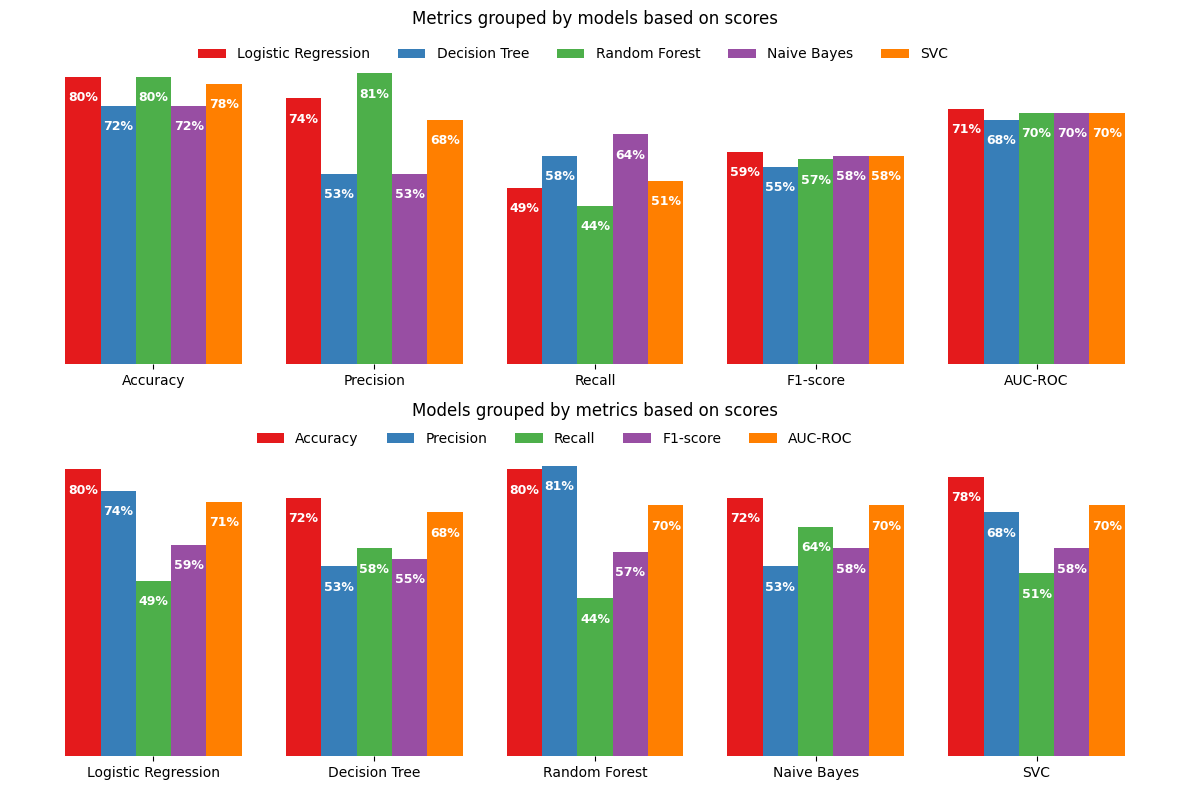

In [55]:
def graf_models_vs_metrics(df):
    # Crear una figura y ejes
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    sns.set_palette('Set1')

    # Gráfica de barras: Modelos en función de las Métricas
    def add_values(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, -15), textcoords='offset points',fontsize=9,color='white',fontweight='bold')
    df.T.plot(kind='bar', ax=ax[0], rot=0, width=0.8)
    ax[0].set_title('Metrics grouped by models based on scores',pad=25)

    # Configuraciones para la primera figura
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].grid(False)
    ax[0].set_yticks([])
    ax[0].legend(title='', bbox_to_anchor=(.15, .95), frameon=False, fontsize=10, ncol=len(df.T.columns))

    # Agregar valores a la primera gráfica
    add_values(ax[0])

    # Gráfica de barras: Métricas en función de los Modelos
    df_model_vs_metrics.plot(kind='bar', ax=ax[1], rot=0, width=0.8)
    ax[1].set_title('Models grouped by metrics based on scores',pad=25)

    # Configuraciones para la segunda figura
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].grid(False)
    ax[1].set_yticks([])
    ax[1].set_xlabel('')
    ax[1].legend(title='', loc='center left', bbox_to_anchor=(.2, 1.04), frameon=False, fontsize=10, ncol=len(df.columns))
    ax[1].set_ylabel('')

    # Agregar valores a la segunda gráfica
    add_values(ax[1])
    plt.tight_layout()
    plt.show()
graf_models_vs_metrics(df_model_vs_metrics)

##Graficar matriz de confusión:

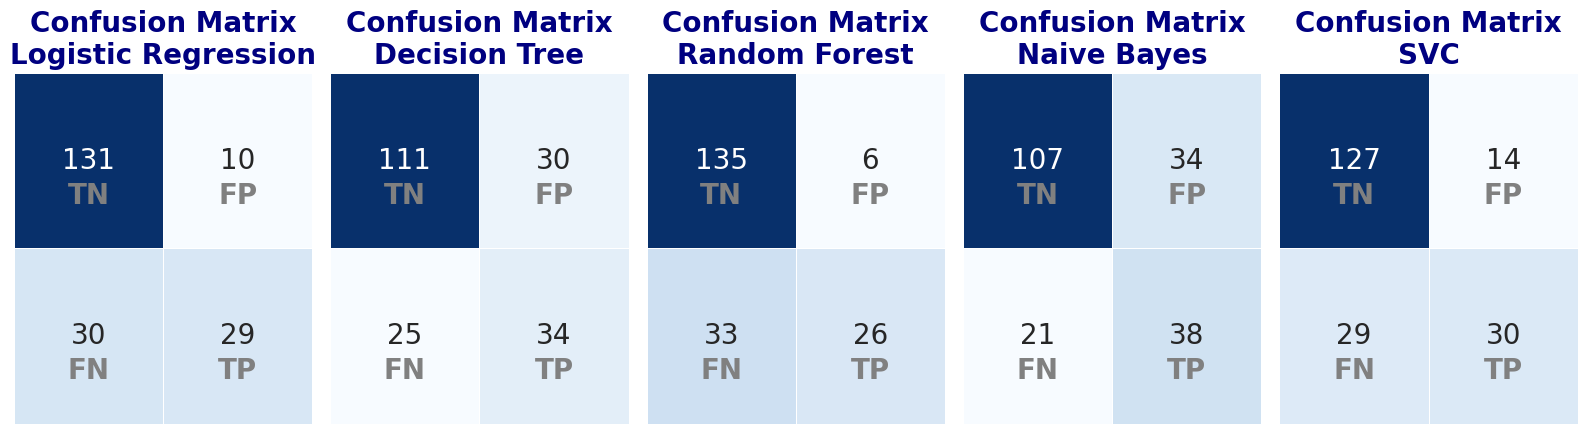

In [106]:
def graf_matrix_confussion(X_new,y_new):
    random_state=42
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=random_state)

    # Inicializa los modelos
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=250)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state) ##'linear', 'precomputed', 'rbf', 'poly', 'sigmoid'

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones:
    y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]
    y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]
    y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]
    y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]
    y_svc_pred_aj = svc_model.predict(X_test)

    # Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
    umbral = .52
    y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
    y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
    y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
    y_nb_pred = (y_nb_pred_aj > umbral).astype(int)
    y_svc_pred = (y_svc_pred_aj > umbral).astype(int)

    # Supongamos que tienes las siguientes matrices de confusión
    conf_matrix_logistic = confusion_matrix(y_test, y_logistic_pred)
    conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
    conf_matrix_forest = confusion_matrix(y_test, y_forest_pred)
    conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)
    conf_matrix_svc = confusion_matrix(y_test, y_svc_pred)

    # Crear un DataFrame a partir de las matrices de confusión
    df_confusion = pd.DataFrame({
        'Logistic Regression': conf_matrix_logistic.flatten(),
        'Decision Tree': conf_matrix_tree.flatten(),
        'Random Forest': conf_matrix_forest.flatten(),
        'Naive Bayes': conf_matrix_nb.flatten(),
        'SVC': conf_matrix_svc.flatten()
    }, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])

    labels = ['TN', 'FP', 'FN', 'TP']

    # Crear una fila de 5 gráficos
    fig, axes = plt.subplots(1, 5, figsize=(16, 4.5))

    # Lista de matrices de confusión y nombres de modelos
    conf_matrices = [conf_matrix_logistic, conf_matrix_tree, conf_matrix_forest, conf_matrix_nb,conf_matrix_svc]
    model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    # Iterar sobre las matrices y nombres de modelos
    for i, (conf_matrix, model_name) in enumerate(zip(conf_matrices, model_names)):
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, ax=ax, xticklabels=['', ''],
                yticklabels=['', ''])
        ax.set_title(f'Confusion Matrix\n{model_name}',fontsize=20,fontweight='bold',color='navy')
        # ax.set_xlabel('Predicted Labels')
        # ax.set_ylabel('True Labels')

        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(j + .5, i + 0.7, labels[i * conf_matrix.shape[1] + j],
                        ha='center', va='center', fontsize=20, color='gray', fontweight='bold')

    # Ajustar el tamaño del texto después de crear el heatmap
    for ax in axes:
        for text in ax.texts:
            text.set_fontsize(20)
    plt.tight_layout()
    # df_confusion
    return plt.show()

X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

graf_matrix_confussion(X,y)

Para analizar las matrices de confusión y determinar el mejor método para predecir el default en préstamos de crédito, se pueden observar las métricas clave como la precisión, la sensibilidad y la especificidad. Aquí hay un análisis basado en estas métricas:

1. **Logistic Regression:**
   - Precision (Exactitud): TP / (TP + FP) = 29 / (29 + 10) = 0.743
   - Sensitivity/recall (Sensibilidad): TP / (TP + FN) = 29 / (29 + 30) = 0.491
   - Specificity (Especificidad): TN / (TN + FP) = 131 / (131 + 10) = 0.929

2. **Decision Tree:**
   - Precision: 34 / (34 + 30) = 0.531
   - Sensitivity/recall: 34 / (34 + 25) = 0.576
   - Specificity: 135 / (135 + 30) = 0.818

3. **Random Forest:**
   - Precision: 26 / (26 + 6) = 0.812
   - Sensitivity/recall: 26 / (26 + 33) = 0.440
   - Specificity: 135 / (135 + 6) = 0.957

4. **Naive Bayes:**
   - Precision: 30 / (30 + 34) = 0.468
   - Sensitivity/recall: 30 / (30 + 21) = 0.588
   - Specificity: 107 / (107 + 34) = 0.758

4. **SVC:**
   - Precision: 30 / (30 + 14) = 0.681
   - Sensitivity/recall: 30 / (30 + 29) = 0.508
   - Specificity: 127 / (127 + 14) = 0.900

**Conclusiones:**
- **Random Forest** tiene la mayor precisión (0.812), lo que significa que es más preciso al predecir los verdaderos positivos.
- **Logistic Regression** tiene una buena especificidad (0.929), lo que indica que es efectivo para predecir los verdaderos negativos.
- **Random Forest** también tiene la mayor especificidad (0.957), destacándose en la identificación de los no-defaults.
- **Naive Bayes** tiene la mayor sensibilidad (0.588), lo que significa que es mejor para identificar los casos de default.

En general, la elección del "mejor" método dependerá de la importancia relativa de la precisión, la sensibilidad y la especificidad en el contexto específico del problema. Si la prioridad es minimizar los falsos positivos (predecir incorrectamente que un cliente no incumplirá), entonces **Random Forest** podría ser preferido. Si es más crítico minimizar los falsos negativos (predecir incorrectamente que un cliente incumplirá), entonces **Naive Bayes** podría ser una opción.

--------------------------------------------------------------------------------


En el contexto de la aceptación o no de un crédito, "default" se refiere a la incapacidad o incumplimiento del prestatario para cumplir con los términos y condiciones acordados del préstamo, especialmente en el pago de las cuotas o devolución del dinero prestado. Aquí tienes una explicación de los términos:

- **Default Positivo (True Positive - TP):**
  Se refiere a los casos en los que el modelo predice correctamente que un solicitante de crédito no cumplirá con los términos del préstamo, y, de hecho, el solicitante no cumple.

- **Default Negativo (True Negative - TN):**
  Se refiere a los casos en los que el modelo predice correctamente que un solicitante de crédito cumplirá con los términos del préstamo, y, de hecho, el solicitante cumple.

- **Falso Positivo (False Positive - FP):**
  Se refiere a los casos en los que el modelo predice incorrectamente que un solicitante de crédito no cumplirá con los términos del préstamo, pero, de hecho, el solicitante cumple.

- **Falso Negativo (False Negative - FN):**
  Se refiere a los casos en los que el modelo predice incorrectamente que un solicitante de crédito cumplirá con los términos del préstamo, pero, de hecho, el solicitante no cumple.

En el contexto de la evaluación de modelos de crédito, generalmente se desea minimizar los falsos positivos, ya que predecir incorrectamente que un solicitante será un incumplidor cuando en realidad no lo es puede llevar a decisiones injustas y a la pérdida de oportunidades de préstamo. Por lo tanto, se considera importante maximizar la precisión y reducir los falsos positivos.


La importancia relativa de reducir los falsos positivos (FP) o los falsos negativos (FN) depende del contexto específico y de los costos asociados con cada tipo de error en la aplicación concreta. Aquí hay algunas consideraciones generales:

1. **Reducir Falsos Positivos (FP):**
   - En el contexto de la evaluación de crédito, reducir los falsos positivos significa evitar denegar crédito a personas que, de hecho, cumplirían con los términos del préstamo. Esto podría ser importante para evitar pérdidas de oportunidades de negocio y mantener a los clientes satisfechos.
   - Sin embargo, la reducción de los FP podría llevar a aprobar a personas que eventualmente incumplirían, lo que podría resultar en pérdidas financieras.

2. **Reducir Falsos Negativos (FN):**
   - Reducir los falsos negativos implica identificar correctamente a aquellos que eventualmente incumplirán con los términos del préstamo. Esto podría ser crucial para minimizar las pérdidas financieras asociadas con préstamos incumplidos.
   - Sin embargo, reducir los FN podría llevar a aprobar a personas que, en realidad, no cumplirán con los términos del préstamo.

En la práctica, a menudo se busca un equilibrio y se utiliza una métrica compuesta, como el F1-score o el área bajo la curva ROC (AUC-ROC), que tiene en cuenta tanto los FP como los FN. Además, los costos asociados con cada tipo de error y los objetivos comerciales específicos también influyen en la decisión sobre qué tipo de error minimizar. Por ejemplo, en situaciones donde los costos de incumplimiento son muy altos, puede ser más importante reducir los falsos negativos.

Para analizar cuál de los modelos de predicción es mejor para determinar el incumplimiento (default) en préstamos de crédito, podemos considerar varias métricas clave que se proporcionan en las tablas. Aquí hay una interpretación general basada en las métricas comunes:

1. **Accuracy (Exactitud):**
   - Es la proporción de predicciones correctas sobre el total de predicciones.
   - El modelo de Random Forest tiene la accuracy más alta (0.81), seguido por Logistic Regression (0.80).

2. **Precision (Precisión):**
   - Indica la proporción de instancias positivas correctamente identificadas entre las predicciones positivas.
   - Random Forest tiene la precision más alta (0.77), seguido por Logistic Regression (0.71).

3. **Recall (Recuperación o Sensibilidad):**
   - Mide la proporción de instancias positivas correctamente identificadas entre todas las instancias positivas reales.
   - Logistic Regression tiene el recall más alto (0.58).

4. **F1 Score:**
   - Es una métrica que combina precision y recall en un solo número.
   - Random Forest tiene el F1 score más alto (0.61), seguido por Logistic Regression (0.64).

5. **ROC AUC:**
   - Es el área bajo la curva ROC y mide la capacidad del modelo para distinguir entre clases.
   - Random Forest tiene el ROC AUC más alto (0.72), seguido por Logistic Regression (0.74).

En general, la elección del "mejor" modelo depende de las prioridades específicas del problema y de cómo se ponderen las métricas. Si se prioriza la precisión general, el modelo de Random Forest parece ser el mejor. Sin embargo, si se valora más el recall (identificar correctamente aquellos que realmente incumplen), entonces Logistic Regression podría ser preferible.

Es importante considerar el contexto del problema y la importancia relativa de los falsos positivos y falsos negativos, ya que diferentes modelos pueden tener desempeños óptimos en diferentes situaciones. Además, podrías considerar la posibilidad de ajustar los umbrales de decisión para obtener un equilibrio óptimo entre precision y recall, según las necesidades específicas del negocio.

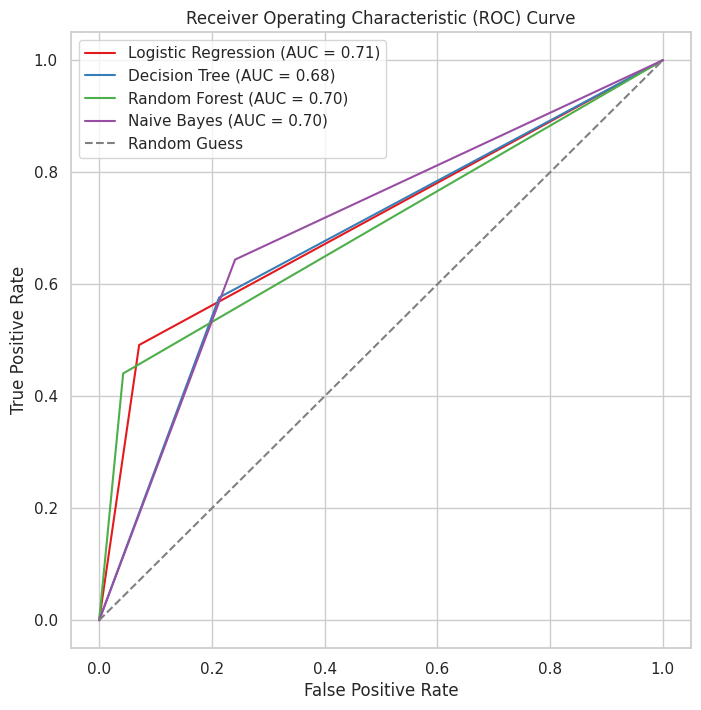

In [107]:
def graf_auc_roc(X_new, y_new):

# Calcular la curva ROC y el área bajo la curva (ROC AUC) para cada modelo
    random_state=42
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=random_state)

    # Inicializa los modelos
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=250)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state) ##'linear', 'precomputed', 'rbf', 'poly', 'sigmoid'

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones:
    y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]
    y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]
    y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]
    y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]
    y_svc_pred_aj = svc_model.predict(X_test)

    # Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
    umbral = .52
    y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
    y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
    y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
    y_nb_pred = (y_nb_pred_aj > umbral).astype(int)
    y_svc_pred = (y_svc_pred_aj > umbral).astype(int)

    fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_logistic_pred)
    roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

    fpr_tree, tpr_tree, _ = roc_curve(y_test, y_tree_pred)
    roc_auc_tree = auc(fpr_tree, tpr_tree)

    fpr_forest, tpr_forest, _ = roc_curve(y_test, y_forest_pred)
    roc_auc_forest = auc(fpr_forest, tpr_forest)

    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_nb_pred)
    roc_auc_nb = auc(fpr_nb, tpr_nb)

    # Crear la gráfica ROC AUC
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
    plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
    plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

    # Configuraciones adicionales de la gráfica
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

graf_auc_roc(X,y)


La Curva ROC (Receiver Operating Characteristic) y su métrica asociada, el Área bajo la Curva ROC (ROC AUC), son herramientas valiosas para evaluar el rendimiento de modelos de clasificación binaria.

La Curva ROC es un gráfico que representa la tasa de verdaderos positivos (Recall o Sensibilidad) en el eje y y la tasa de falsos positivos (1 - Especificidad) en el eje x. Cada punto en la curva representa un umbral de decisión diferente para el clasificador. Un modelo perfecto tendría un área bajo la curva (ROC AUC) igual a 1, mientras que un modelo que no es mejor que el azar tendría un área bajo la curva cercana a 0.5.

Ahora, el ROC AUC proporciona una métrica resumida de la curva ROC. Es el área debajo de la curva ROC y varía entre 0 y 1. Un valor más alto de ROC AUC indica un mejor rendimiento del modelo. Veamos el significado de los valores específicos:

- **ROC AUC = 0.5**: El modelo no es mejor que una clasificación aleatoria.
- **ROC AUC > 0.5**: El modelo es mejor que una clasificación aleatoria. Cuanto más cerca de 1, mejor.
- **ROC AUC = 1**: El modelo clasifica perfectamente las clases.

En tu descripción, mencionas que Random Forest tiene el ROC AUC más alto (0.72), seguido por Logistic Regression (0.74). Esto significa que, según esta métrica, Logistic Regression tiene un rendimiento superior a Random Forest en términos de distinguir entre las clases. Sin embargo, es importante tener en cuenta que la elección del modelo óptimo no debe basarse únicamente en una métrica. Es útil considerar múltiples métricas y el contexto específico del problema.

En resumen, el ROC AUC proporciona una medida de la capacidad de un modelo para discriminar entre clases, especialmente en configuraciones de clasificación binaria. Un valor más alto indica un mejor rendimiento en términos de equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos.

##Extraer fila aleatoria para luego probar en modelo:

In [56]:
def file_random():
    comienza = random.randint(0, len(df_bank))
    file_random=df_bank.iloc[comienza]
    file_random=pd.DataFrame(file_random)
    file_random=file_random.T
    file_random.drop('Incumplimiento',axis=1,inplace=True)
    return file_random
file_random()

,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
914,1,2,10,5,3,4,1,2,2,3,1,1,3,1,1,1,2,4,2,0,1


#Graficar decisión:

In [57]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
forest_model = RandomForestClassifier(random_state=42,max_features='sqrt', n_estimators=250)
forest_model.fit(X_train, y_train)

### Predecir fila aleatoria con la función: file_random()
probabilidades_predichas = forest_model.predict_proba(file_random())

# Seleccionar las probabilidades de la clase 1 (default)
probabilidades_default = probabilidades_predichas[:, 1]

# Establecer un umbral para determinar la clase
umbral = 0.5
prediccion_binaria = (probabilidades_default > umbral).astype(int)

# Calcular el porcentaje de acierto para la clase:
if prediccion_binaria[0] == 1:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 1].mean()
else:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 0].mean()

# Imprimir la respuesta con el porcentaje de acierto
if prediccion_binaria[0] == 1:
    print(f'El Cliente NO es apto. Porcentaje de acierto: {porcentaje_acierto_default * 100:.2f}%')
else:
    print(f'El Cliente SI es apto. Porcentaje de acierto: {(1 - porcentaje_acierto_default) * 100:.2f}%')
# print(probabilidades_predichas[0][0])
# prediccion_binaria[0]

El Cliente SI es apto. Porcentaje de acierto: 87.60%


In [58]:
def reloj_default(prediccion_binaria,porcentaje_acierto_default):
    nuevos_valores = [0.25, 0.25,0.25, 0.25,0.25, 0.25,0.25, 0.25]
    if prediccion_binaria[0] == 1:
        success=int(porcentaje_acierto_default*100)
        # success=70
        plt.annotate(f'{success}%', xy=(-1.25,.7),fontsize=20,color='darkorange',fontweight='bold')
        plt.annotate('Cliente NO es apto', xy=(-0.9,-.30),color='darkorange', fontsize=20)
        if success>0 and success<30:
          plt.annotate("", xy=(0, 0), xytext=(-.15, .6), arrowprops=dict(arrowstyle='<-', linewidth=4, color='gold'))
        elif success>=30 and success<51:
          plt.annotate("", xy=(0, 0), xytext=(-.3, .5), arrowprops=dict(arrowstyle='<-', linewidth=4, color='gold'))
        elif success>=51 and success<65:
          plt.annotate("", xy=(0, 0), xytext=(-.5, .4), arrowprops=dict(arrowstyle='<-', linewidth=4, color='orange'))
        elif success>=65 and success<75:
          plt.annotate("", xy=(0, 0), xytext=(-.6, .2), arrowprops=dict(arrowstyle='<-', linewidth=4, color='orange'))
        elif success<100:
          plt.annotate("", xy=(0, 0), xytext=(-.6, 0.05), arrowprops=dict(arrowstyle='<-', linewidth=4, color='orange'))
    else:
        success=int((1-porcentaje_acierto_default)*100)
        # success=55
        plt.annotate('Cliente SI es apto', xy=(-0.95,-.30),color='forestgreen', fontsize=20)
        plt.annotate(f'{success}%', xy=(1,.7),fontsize=20,color='forestgreen',fontweight='bold')
        if success>0 and success<30:
          plt.annotate("", xy=(0, 0), xytext=(.15, .6), arrowprops=dict(arrowstyle='<-', linewidth=5, color='limegreen'))
        elif success>=30 and success<51:
          plt.annotate("", xy=(0, 0), xytext=(.3, .5), arrowprops=dict(arrowstyle='<-', linewidth=5, color='limegreen'))
        elif success>=51 and success<65:
          plt.annotate("", xy=(0, 0), xytext=(.5, .4), arrowprops=dict(arrowstyle='<-', linewidth=5, color='forestgreen'))
        elif success>=65 and success<75:
          plt.annotate("", xy=(0, 0), xytext=(.6, .2), arrowprops=dict(arrowstyle='<-', linewidth=5, color='green'))
        elif success<100:
          plt.annotate("", xy=(0, 0), xytext=(.6, 0.05), arrowprops=dict(arrowstyle='<-', linewidth=5, color='green'))

    etiquetas=['super', 'bueno','bajo','malo','', '','','']
    colores = ['green', 'limegreen', 'yellow', 'orange', 'white', 'white', 'white', 'white']
    plt.pie(nuevos_valores,labels=etiquetas, colors=colores,startangle=0,textprops={'fontsize': 16,'color':'gray','fontweight':'bold'}, wedgeprops=dict(width=0.4))

    # Coordenadas polares para el semicírculo
    theta = np.linspace(0, np.pi, 200)
    x = np.cos(theta)
    y = np.sin(theta)

    # Graficar el semicírculo
    plt.plot(x, y, color='silver', linewidth=10)

    # Graficar la línea de la primera porción de pastel
    plt.plot(x, y, color='black', linewidth=2)
    plt.title('CREDIT SCORES',pad=5,color='gray', fontsize=20,fontweight='bold')
    plt.show()

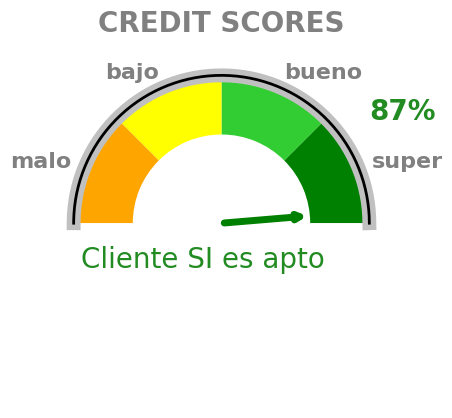

In [59]:
reloj_default(prediccion_binaria,porcentaje_acierto_default)

## Funcion para generar Data Frame con comparativa de métricas vs modelos:

In [60]:
def compare_model(df_new):

    random_state=42
    X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Incumplimiento', axis=1), df_new['Incumplimiento'], test_size=0.2, random_state=42)

    # Inicializa los modelos
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=250)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state)

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones:
    y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]
    y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]
    y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]
    y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]
    y_svc_pred_aj = svc_model.predict(X_test)

# Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
    umbral = .52
    y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
    y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
    y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
    y_nb_pred = (y_nb_pred_aj > umbral).astype(int)

    # Datos para las métricas
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    accuracy_values = [accuracy_score(y_test, y_logistic_pred),
                      accuracy_score(y_test, y_tree_pred),
                      accuracy_score(y_test, y_forest_pred),
                      accuracy_score(y_test, y_nb_pred),
                      accuracy_score(y_test, y_svc_pred_aj)]

    precision_values = [precision_score(y_test, y_logistic_pred),
                        precision_score(y_test, y_tree_pred),
                        precision_score(y_test, y_forest_pred),
                        precision_score(y_test, y_nb_pred),
                        precision_score(y_test, y_svc_pred_aj)]

    recall_values = [recall_score(y_test, y_logistic_pred),
                    recall_score(y_test, y_tree_pred),
                    recall_score(y_test, y_forest_pred),
                    recall_score(y_test, y_nb_pred),
                    recall_score(y_test, y_svc_pred_aj)]

    f1_values = [f1_score(y_test, y_logistic_pred),
                  f1_score(y_test, y_tree_pred),
                  f1_score(y_test, y_forest_pred),
                  f1_score(y_test, y_nb_pred),
                  f1_score(y_test, y_svc_pred_aj)]

    roc_auc_values = [roc_auc_score(y_test, y_logistic_pred),
                      roc_auc_score(y_test, y_tree_pred),
                      roc_auc_score(y_test, y_forest_pred),
                      roc_auc_score(y_test, y_nb_pred),
                      roc_auc_score(y_test, y_svc_pred_aj)]


    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    # Crear un DataFrame:
    df_metrics = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'F1-score': f1_values,
        'AUC-ROC': roc_auc_values
    })
    return df_metrics.round(2)

##Ingeniería de Características:

Crea nuevas características que puedan ser más informativas o combina características existentes de manera efectiva.

In [61]:
df = df_bank.copy()
df['Proposito'] = df['Proposito'].replace({6: 3, 7: 3, 8: 3, 9: 3})###
df['Historial_credito'] = df['Historial_credito'].replace({2: 1, 3: 2, 4: 2})
df['Creditos_en_banco'] = df['Creditos_en_banco'].replace({4: 3})
df['Trabajador_extranjero'] = df['Trabajador_extranjero'].replace({2:1})
df['Telefono'] = df['Telefono'].replace({2:1})
df['Rango_edad'] = df['Rango_edad'].replace({6:5})
df['Rango_valor_credito'] = df['Rango_valor_credito'].replace({10:9,11:9,16:14,19:14})

# df.drop('Estado_cuenta', axis=1,inplace=True)
X = df.drop('Incumplimiento', axis=1)
y = df['Incumplimiento']

### llamar a la función para mostrar DF:
df_model_vs_metrics=compare_model(df).set_index('Model')
df_model_vs_metrics.T

Model,Logistic Regression,Decision Tree,Random Forest,Naive Bayes,SVC
Accuracy,0.81,0.71,0.82,0.72,0.80
Precision,0.73,0.51,0.85,0.51,0.69
Recall,0.56,0.58,0.49,0.63,0.56
F1-score,0.63,0.54,0.62,0.56,0.62
AUC-ROC,0.74,0.67,0.73,0.69,0.73


##Graficar con nuevos modelos vs métricas y viceversa:

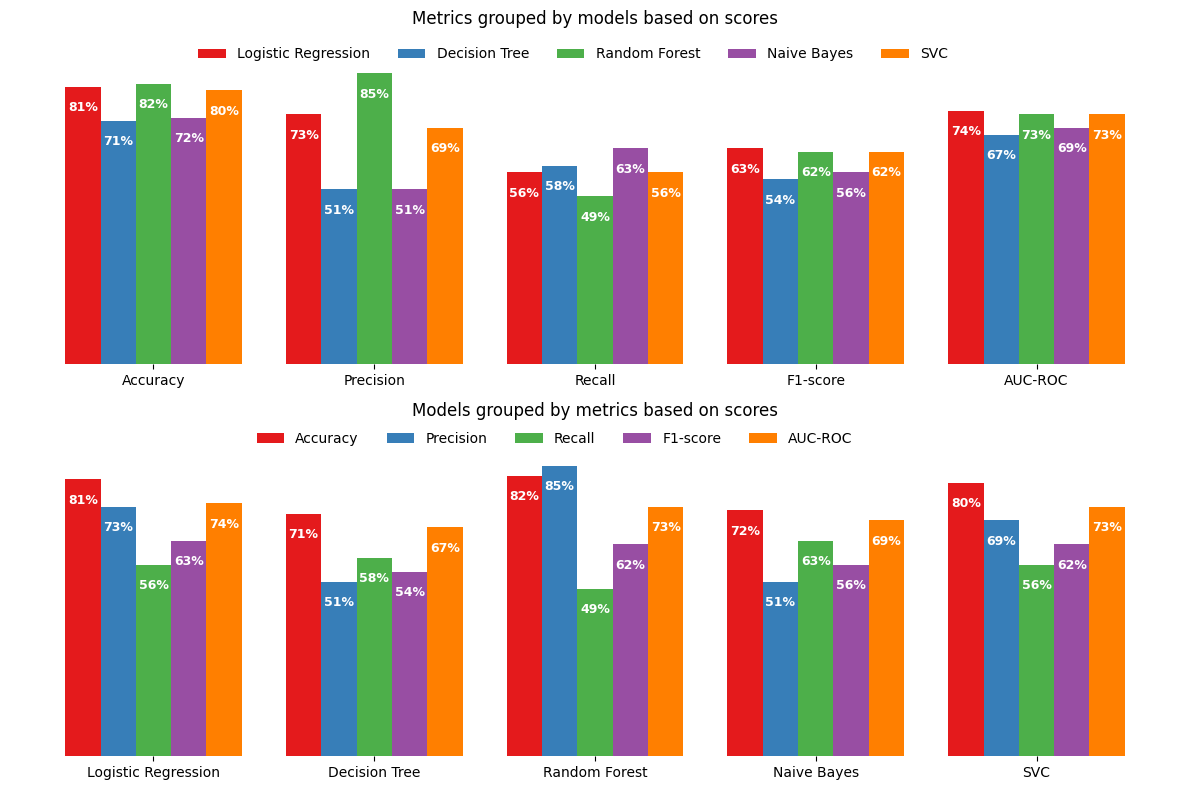

In [62]:
graf_models_vs_metrics(df_model_vs_metrics)

#**Conclusión final:**
##**Considerando todas las métricas, el modelo Random Forest tiene el mejor rendimiento general, con la mayor accuracy (82%) y precision (85%) y AUC-ROC (83%), y un equilibrio razonable entre precision y recall. Por lo tanto, se recomendaría utilizar el modelo de Random Forest para predecir la variable 'default'.**

1. **Random Forest:**
   - Precision (Exactitud): TP / (TP + FP) = 29 / (29 + 5) = 0.853
   - Sensitivity/recall (Sensibilidad): TP / (TP + FN) = 29 / (29 + 30) = 0.491
   - Specificity (Especificidad): TN / (TN + FP) = 136 / (136 + 5) = 0.964

  **Como podememos apreciar, este modelo mejoró en su precision y en su especificidad, manteniendo el valor anterior de recall**

- **Random Forest** pasó de una precisión (0.812) a (0.853), lo que significa que es más preciso al predecir los verdaderos positivos.
- **Random Forest** pasó de una especificidad (0.957) a (0.964), destacándose en la identificación de los no-defaults.

##**Por lo tanto, si nuestro objetivo de empresa es captar la mayor cantidad de nuevos clientes, el Modelo Random Forest resulta el mejor**

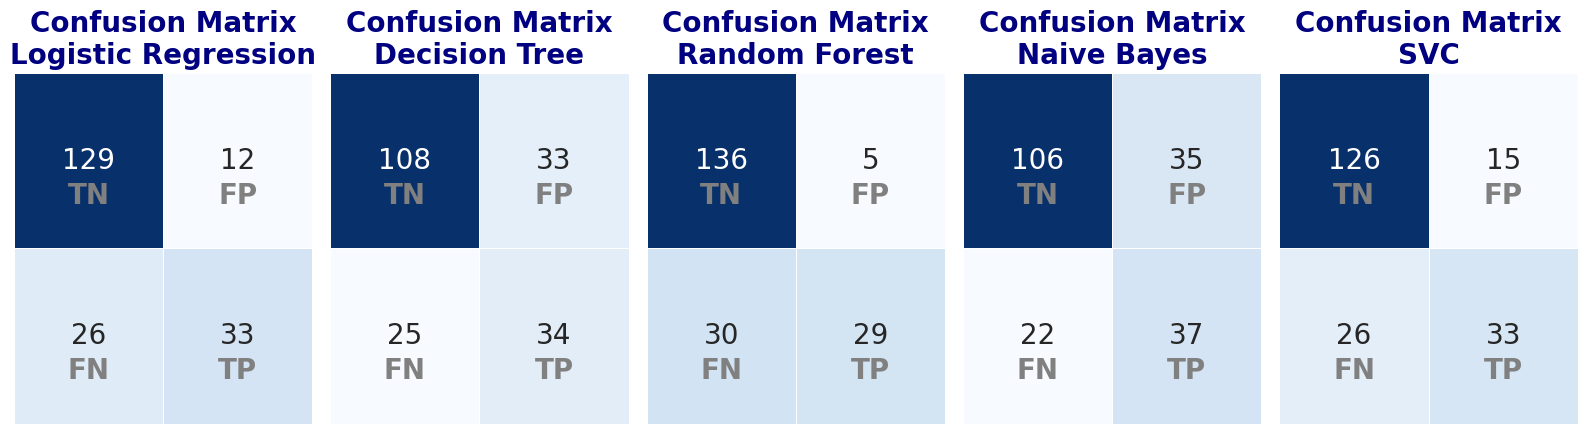

In [116]:
X = df.drop('Incumplimiento', axis=1)
y = df['Incumplimiento']
graf_matrix_confussion(X,y)

#Pronosticar un cliente aleatorio del dataset original:

In [70]:
def predecir_cliente():
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Incumplimiento', axis=1), df['Incumplimiento'], test_size=0.2, random_state=42)

    # RANDOM FOREST
    forest_model = RandomForestClassifier(random_state=42,max_features='sqrt', n_estimators=250)
    forest_model.fit(X_train, y_train)

    ### Predecir fila aleatoria con la función: file_random()
    file=file_random()
    probabilidades_predichas = forest_model.predict_proba(file)

    # Seleccionar las probabilidades de la clase 1 (default)
    probabilidades_default = probabilidades_predichas[:, 1]

    # Establecer un umbral para determinar la clase
    umbral = 0.5
    prediccion_binaria = (probabilidades_default > umbral).astype(int)

    # Calcular el porcentaje de acierto para la clase:
    if prediccion_binaria[0] == 1:
      porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 1].mean()
    else:
      porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 0].mean()

    # Imprimir la respuesta con el porcentaje de acierto
    if prediccion_binaria[0] == 1:
        result=f'El Cliente NO es apto. Porcentaje de acierto: {porcentaje_acierto_default * 100:.2f}%'
    else:
        result=f'El Cliente SI es apto. Porcentaje de acierto: {(1 - porcentaje_acierto_default) * 100:.2f}%'
    return str(prediccion_binaria[0]),porcentaje_acierto_default,result



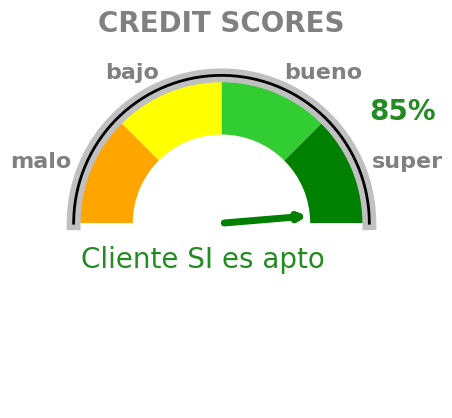

In [71]:
default=predecir_cliente()[0]
porcentaje_acierto=predecir_cliente()[1]
reloj_default(default,porcentaje_acierto)


#Aplico get_dummies al df mejorado con Ingeniería de Características:


In [136]:
df_dummies_input = df.copy()

# Iteramos sobre las columnas del DataFrame y aplicamos get_dummies
for var in df_dummies_input.columns[1:]:
    df_dummies = pd.get_dummies(df_dummies_input[var], prefix=var)

    # Concatenamos las nuevas columnas binarias al DataFrame original
    df_dummies_input = pd.concat([df_dummies_input, df_dummies], axis=1)

    # Eliminamos la columna original si lo deseas
    df_dummies_input.drop(var, axis=1, inplace=True)

compare_model(df_dummies_input).set_index('Model')

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Logistic Regression,0.78,0.66,0.53,0.58,0.71
Decision Tree,0.68,0.45,0.47,0.46,0.62
Random Forest,0.76,0.74,0.29,0.41,0.62
Naive Bayes,0.74,0.57,0.49,0.53,0.67
SVC,0.78,0.68,0.47,0.56,0.69


##Como se observa en la tabla anterior, las métricas presentan valores bajos a lo ya alcanzados. Por lo que se descarta este método.

##EJECUTAR CARGA DE NUEVO CLIENTE PARA VER SU CONDICION DEFAULT

Ingrese el valor:
                                               Estado_cuenta
0                                                         DM
1                                          0 <= ... < 200 DM
2  >= 200 DM /asignaciones salariales durante al menos 1 año
3                                        No cuenta corriente
 1
Ingrese el valor:
                                                Historial_credito
0  sin créditos tomados/ todos los créditos devueltos debidamente
1          todos los créditos en este banco devueltos debidamente
2           créditos existentes devueltos debidamente hasta ahora
3                                 retraso en el pago en el pasado
4    cuenta crítica/ otros créditos existentes (no en este banco)
 1
Ingrese el valor:
                         Proposito
0                    coche (nuevo)
1                    coche (usado)
2              Mobiliario y equipo
3               Radio y televisión
4   desecho de aparatos domésticos
5             gastos de repar

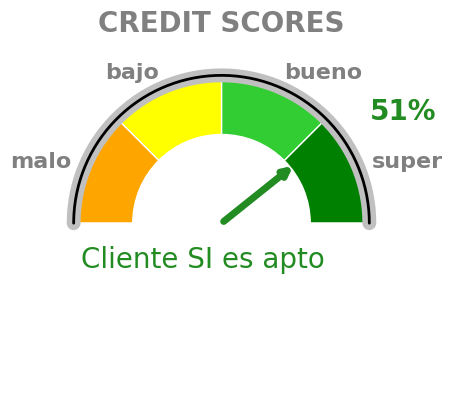

,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# Definir las columnas del DataFrame
df_col=df.drop('Incumplimiento', axis=1).copy()
columnas=df_col.columns
# Crear un diccionario para almacenar los valores ingresados por teclado
valores = {}

# Solicitar al usuario que ingrese los valores para cada columna:
for columna in columnas:
    categorie = df_dic[df_dic['name'] == columna ]['categories'].iloc[0]
    b=[]
    for i in categorie:
      b.append(traducir(i))
    b=pd.DataFrame(b,columns=[columna])
    valor = input(f"Ingrese el valor:\n{b}\n ")
    valores[columna] = [int(valor)]

# Crear el DataFrame con los valores ingresados
df_file = pd.DataFrame(valores)

# RANDOM FOREST
forest_model = RandomForestClassifier(random_state=42,max_features='sqrt', n_estimators=250)
forest_model.fit(X_train, y_train)

# Mostrar el DataFrame resultante
# predic = forest_model.predict_proba(df_file)

probabilidades_predichas = forest_model.predict_proba(df_file)

# Seleccionar las probabilidades de la clase 1 (default)
probabilidades_default = probabilidades_predichas[:, 1]

# Establecer un umbral para determinar la clase
umbral = 0.5
prediccion_binaria = (probabilidades_default > umbral).astype(int)

# Calcular el porcentaje de acierto para la clase:
if prediccion_binaria[0] == 1:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 1].mean()
else:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 0].mean()

# Imprimir la respuesta con el porcentaje de acierto
if prediccion_binaria[0] == 1:
    print(f'El Cliente NO es apto. Porcentaje de acierto: {porcentaje_acierto_default * 100:.2f}%')
else:
    print(f'El Cliente SI es apto. Porcentaje de acierto: {(1 - porcentaje_acierto_default) * 100:.2f}%')
reloj_default(prediccion_binaria,porcentaje_acierto_default)
df_file